# Data Analysis and Presentation for the Ramachandran Plot

This project uses protein structure data from two datasets, calculates the φ and ψ angles of its amino acid residues, generates Ramachandran plots, and compares the differences between them. Possible reasons for these differences are explored, and data filtering strategies are proposed so that the Ramachandran plot of the dataset_2 looks closer to that of the dataset_1. Other matters that should be considered are also discussed and the plots are well optimized.

Generally speaking, we can run all the code in sequence. But the code document is long. After completing the preparation work, we can run the parts that need debugging separately. For the parts that do not need debugging, we can click the **arrow** on the left to collapse them.

## Preparation

In [47]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [48]:
# Install the necessary labriaies
!pip install Bio
!pip install gemmi

In [ ]:
# Download the PDB files of dataset_1 from the web
# If the pdb files already downloaded, don't need to run this cell it every time

mkdir -p download/data1
from tqdm.notebook import tqdm
import wget

pdb_codes = "1A7Y,1A7Z,1AL4,1BXO,1BYZ,1C0Q,1C58,1C5E,1CEX,1CXE,1D8G,1DPL,1DY5,1E0W,1EA7,1EB6,1EJG,1G66,1GA1,1GA6,1GCI,1GKM,1GVT,1GVU,1GWE,1GWH,1H11,1H12,1H2J,1H5V,1HBZ,1HET,1HF6,1HHU,1HHY,1HJ9,1HQ2,1HX0,1I1W,1I1X,1IC6,1IQZ,1IR0,1ITX,1IUA,1IX9,1IXB,1IXG,1J0P,1J8G,1JFB,1JKV,1JM1,1K5C,1K7C,1KCC,1KQP,1KWF,1LJN,1M15,1M24,1M40,1MC2,1ME3,1MJ4,1MNZ,1MWQ,1MXT,1N1P,1N4U,1N4W,1N55,1NKD,1NPI,1O1X,1O7J,1OB4,1OB6,1OB7,1OC7,1OCQ,1OD8,1OK0,1P79,1P7V,1P9G,1PI3,1PJX,1PWL,1PWM,1QD8,1R6J,1RW1,1S0R,1S1Y,1S1Z,1S5M,1S5N,1SAU,1SDE,1SFS,1SIX,1SJM,1SSX,1T1C,1T41,1T7H,1TS0,1UFY,1UG6,1UOZ,1UQX,1US0,1UWC,1UZV,1V0K,1V0L,1V0M,1V0N,1V7S,1VB0,1VL9,1VRO,1VYR,1W23,1W3K,1W3L,1W8F,1WB4,1WB5,1WL4,1WUI,1WUK,1X6X,1X8O,1X8Q,1XF6,1XG0,1YK4,1YLJ,1YQS,1Z3N,1ZGK,1ZJZ,1ZL0,1ZZK,2AGE,2AGI,2AGT,2ASC,2AVM,2AVO,2B3H,2BCH,2BF6,2BK9,2BLV,2BLW,2BO0,2BOI,2BT9,2BV4,2BW4,2BY5,2BY6,2BY9,2BZV,2CAK,2CHH,2CNQ,2CS7,2CWS,2D4J,2DFB,2DFC,2DSX,2FKK,2FOU,2FVY,2FZD,2G0V,2G0X,2G0Z,2G10,2G11,2G12,2G14,2GGC,2GKG,2GLK,2GRZ,2H5C,2H5D,2HDS,2I16,2I17,2I61,2IDQ,2IGD,2IZQ,2J8T,2JDH,2JDK,2JFR,2JJJ,2NLS,2NUK,2NWF,2O6N,2O7A,2O9S,2OB3,2OFC,2OL9,2OSX,2P02,2P74,2P86,2PEV,2PF8,2PFH,2PGO,2PVB,2PVE,2PWA,2PYA,2QAA,2QDV,2QXW,2RB5,2RH2,2UXY,2V8B,2V8T,2V8U,2V9L,2VB1,2VHK,2VHR,2VI2,2VI3,2VK5,2VU6,2VX6,2VXN,2WFI,2WFJ,2WNA,2XFR,2XJI,2XJP,2XJR,2XOM,2XTS,2XTT,2Y61,2Y62,2Y78,2YEO,2YGI,2YGJ,2YKZ,2YL7,2YR5,2YR6,2ZK9,3A2O,3A38,3A39,3A5F,3A71,3A72,3AGN,3AJ4,3AJ8,3AL7,3ALD,3AYI,3AYJ,3AYL,3BCJ,3D1P,3D92,3D93,3DLC,3DR0,3EA6,3EX4,3F7L,3FM6,3FMU,3FO3,3FSA,3FX5,3G5T,3G9X,3GGK,3GHR,3GHS,3GHT,3GHU,3HGP,3HYN,3I5L,3IP0,3JQ0,3JU4,3KAN,3KLR,3KWE,3KYU,3LAA,3LEP,3LQL,3LWX,3LZ3,3LZ5,3LZT,3M1X,3M4H,3M5Q,3M8M,3MD7,3MFJ,3MI4,3MNB,3MNG,3MQD,3MTY,3MU4,3MYB,3NE0,3NVS,3O4P,3ODD,3OMJ,3ONC,3P4J,3P95,3PPL,3PUC,3Q46,3Q4W,3QHB,3QL9,3QM9,3QMP,3QOM,3QPA,3QR7,3QRN,3R4G,3R6T,3RCG,3RDA,3RPE,3RVQ,3RY1,3RY2,3S6E,3SBN,3SXX,3T2C,3T2D,3T74,3T87,3TBN,3TC8,3TEU,3U0F,3U2C,3U3H,3U7C,3U7T,3U89,3UI4,3UI5,3UI6,3ULJ,3UNX,3URC,3V1A,3VIJ,3VN3,3VOR,3W07,3WDN,3WFL,3WGE,3WH7,3WKQ,3WOU,3WQ1,3WVM,3X1F,3X1G,3X1N,3X2G,3X2H,3X2J,3X2K,3X2L,3X2M,3X2N,3X32,3X34,3X3O,3X3P,3X3Q,3X3R,3X3S,3X3T,3ZIY,3ZOJ,3ZQW,3ZUC,3ZZP,4A02,4A29,4A8I,4A8L,4A8N,4A8R,4A9V,4AAZ,4ACJ,4AL0,4AR5,4AR6,4AS8,4AWS,4AWT,4AYO,4AYP,4AYQ,4AYR,4AZ6,4B9A,4B9E,4BAZ,4BCT,4BD0,4BJ0,4BLK,4BLL,4BVM,4BY3,4BZ3,4C09,4C1C,4C1H,4C6D,4C6E,4C6F,4C80,4CD4,4CFY,4CHI,4CJ0,4CO8,4CSS,4CST,4CW2,4CW3,4CW6,4CXP,4D13,4D17,4D19,4D5M,4D6G,4DD5,4DPB,4DVC,4E0K,4E8S,4EIC,4ESR,4EUZ,4EZ8,4F18,4F19,4F1U,4F1V,4FIK,4FK9,4FON,4FRC,4FRU,4FRV,4G13,4G9S,4GBU,4GHO,4GIE,4GXM,4GZN,4HBT,4HBU,4HCJ,4HGU,4HIF,4HIG,4HK8,4HKL,4HNO,4I8G,4I8H,4I8J,4I8K,4I8L,4IAU,4ID4,4IE1,4III,4IK2,4IQB,4IZX,4J5C,4J5E,4J5K,4J5O,4JBB,4JCM,4JED,4JM8,4JM9,4JQN,4JU9,4JXR,4K6O,4K7Y,4K8E,4KNK,4KQP,4KRG,4KTS,4KXU,4KXV,4KXW,4L05,4LAZ,4LB3,4LB4,4LBR,4LBS,4LBT,4LF0,4LHR,4LTG,4M51,4M7G,4MF5,4MF6,4MJ9,4MKU,4MTM,4MTY,4MU3,4MZB,4MZC,4MZN,4N1I,4N2R,4N4E,4N5P,4NAX,4NBR,4NCY,4NDS,4NDT,4NG5,4NLF,4NPD,4NQR,4NVB,4NYX,4O6U,4O8H,4OCB,4OQ0,4OQ4,4OTS,4OY5,4P2G,4P36,4P3R,4PRT,4PSY,4PW0,4Q68,4QHW,4QIO,4QK7,4QKC,4QUS,4QY6,4QYT,4R4R,4R4S,4R8J,4REK,4RGC,4RJ1,4RKV,4RNE,4RTY,4RU5,4RV5,4RXV,4S0Z,4S27,4S28,4S39,4TJZ,4TKB,4TKH,4TKJ,4TUT,4TZ1,4U2L,4U2S,4U2W,4U9H,4U9I,4UA6,4UA7,4UA9,4UAA,4UBZ,4UE7,4UEH,4UHC,4UHD,4UHF,4UHH,4UHM,4UHO,4UMI,4UNU,4UQE,4URF,4US6,4US8,4US9,4USA,4UTF,4UTJ,4UTM,4UU3,4UYR,4V28,4W5Y,4W8B,4W9Z,4WES,4WFO,4WKA,4WL4,4WPL,4WUI,4WWB,4WX4,4X18,4X1A,4X1Z,4X5P,4X5Q,4X9Y,4XDX,4XOJ,4XOT,4XV6,4XVB,4XWR,4XXG,4Y38,4Y39,4Y3A,4Y3E,4Y3H,4Y3L,4Y3Q,4Y3Z,4Y44,4Y45,4Y4A,4Y4E,4Y4J,4Y5L,4Y9V,4Y9W,4YCK,4YD3,4YD5,4YEO,4YMY,4YSD,4YTA,4Z0W,4Z6M,4ZAR,4ZAV,4ZB2,4ZE6,4ZGF,4ZGG,4ZM7,4ZUR,5A0E,5A0Y,5A1I,5A6M,5A71,5A8C,5A8K,5ACM,5AF9,5AFY,5AI3,5AIF,5AIG,5AKR,5AL6,5AOS,5AQE,5ARB,5ARC,5AVD,5AVH,5AWL,5B27,5B28,5B5H,5BV2,5CKL,5COF,5CTA,5CTM,5CUR,5D14,5D8V,5D99,5D9E,5DJ7,5DK1,5DKM,5DP2,5DQ4,5DR3,5DZE,5E1Y,5E21,5E9N,5E9P,5ECU,5EKW,5EL9,5ELW,5EMB,5EN4,5EPU,5ETK,5ETP,5F82,5F8S,5F8W,5FBF,5FES,5FEW,5FEZ,5FLK,5FSJ,5FST,5FUI,5G0R,5G2V,5GTQ,5HB7,5HBS,5HGX,5HYV,5I32,5I4I,5I5B,5I6A,5I89,5IHS,5IM9,5IMA,5IQX,5J25,5J9V,5JAC,5JDT,5JEU,5JGS,5JGT,5JK4,5JRY,5JS3,5JSH,5JSK,5JSS,5JSV,5JSY,5JT9,5JVI,5JXN,5K8H,5KCP,5KWM,5KXU,5KXV,5KZ6,5L3U,5L41,5L8P,5LBY,5LBZ,5LHW,5LIF,5LOK,5LP9,5LS7,5LSV,5LVD,5LWD,5LWR,5LWS,5LXX,5M03,5M0W,5M17,5M2H,5M2K,5M2T,5M3W,5M5F,5M9W,5MA7,5MAS,5MB3,5MB6,5MEH,5MEL,5MFR,5MFS,5MFT,5MH1,5MK9,5MN1,5MNB,5MNC,5MNE,5MNF,5MNG,5MNH,5MNK,5MNL,5MNM,5MNN,5MNO,5MNP,5MNR,5MON,5MOP,5MOQ,5MOR,5MOS,5MTT,5N2T,5N2X,5N2Z,5N31,5N34,5N3V,5N3Y,5N9H,5NC0,5NFK,5NFM,5NG9,5NGN,5NYA,5O0U,5O2E,5O2X,5O45,5O6X,5O7U,5O8I,5O99,5OAX,5OBK,5OGH,5OL4,5OME,5OPZ,5OQZ,5OTN,5OXA,5OXC,5P3B,5P3T,5P3U,5P3Y,5P40,5P42,5P44,5P45,5P46,5P47,5P48,5P4O,5P50,5P53,5P54,5P59,5P5I,5P5J,5P5M,5P5O,5P5V,5P5X,5P64,5P6L,5P70,5P71,5P72,5P73,5P74,5P76,5P7G,5P82,5P8H,5P8M,5P8Q,5P8R,5P8T,5P93,5R1U,5R1V,5R1X,5R1Y,5R20,5R25,5R2D,5R2G,5R2L,5R30,5R31,5R32,5R33,5R35,5R39,5R3C,5R3D,5R3H,5R3L,5R3R,5R3T,5R3Y,5R42,5R43,5R44,5R45,5R46,5R47,5R48,5R49,5R4A,5R4C,5SOX,5SQB,5SSX,5SY4,5SY6,5SY9,5SYA,5T5L,5T7K,5TDA,5TDB,5TFQ,5TG0,5TG4,5TIF,5TNV,5TOG,5TP0,5TVY,5TXH,5U3A,5U8P,5UGR,5UL8,5UM2,5UUN,5UUO,5VG0,5VSG,5W8Q,5WC4,5WC7,5WGI,5WHP,5WQQ,5WQR,5WS7,5X9L,5XBX,5XC8,5XC9,5XH2,5XJZ,5XP6,5XPS,5XQK,5XQP,5XQU,5XR0,5XRV,5XT0,5XTV,5XTX,5XUF,5XVT,5Y0M,5Y2R,5Y2S,5Y46,5YDE,5YOK,5YTL,5YUI,5YUJ,5YUK,5YYP,5Z3A,5Z3B,5Z3D,5Z3E,5Z3F,5Z89,5ZGI,5ZGL,5ZGT,5ZGX,5ZGZ,5ZH0,5ZIO,5ZJ7,5ZJ8,5ZKS,5ZW7,6A9S,6AF7,6AF9,6AIQ,6AIR,6AKN,6ANM,6B8F,6B8G,6BXX,6C3T,6CAF,6CNW,6COA,6DBC,6DDJ,6DIX,6DIY,6DL0,6DTV,6E5Z,6E85,6EEX,6EIO,6EQE,6ER4,6ET4,6ETL,6ETM,6EVH,6EXY,6EY1,6EYM,6F1J,6F3P,6F3Q,6F6Q,6F7R,6F81,6F82,6F9O,6FM6,6FM7,6FMC,6FOP,6FPO,6FSI,6FWG,6FWP,6G1G,6G7R,6G8A,6G8E,6G9G,6GD6,6GDC,6GI7,6GKE,6GM9,6GMB,6GX2,6H0W,6H10,6H40,6HA3,6HAD,6HAV,6HCX,6HFK,6HFL,6HFP,6HFQ,6HG0,6HMC,6HMH,6HMQ,6HN3,6HQX,6HS9,6HSA,6HXD,6I0W,6I1U,6I2F,6I6M,6I6N,6I7X,6I7Y,6I9P,6I9T,6IGG,6IGH,6JB9,6JGH,6JGI,6JGJ,6JJQ,6JT5,6K9O,6KFN,6KK8,6KKZ,6KL0,6KL1,6KLZ,6KM0,6KM1,6KM2,6KM3,6KM4,6KM5,6KM6,6L27,6L46,6LL8,6LUU,6LUY,6LUZ,6LV2,6LV4,6LV6,6LV7,6LV8,6M2P,6MC2,6MQ4,6MU9,6MZ2,6N59,6NFD,6NI4,6NI6,6NI7,6NIA,6NIB,6NIZ,6NJ3,6NLA,6NNR,6NP2,6NP3,6NP4,6NP5,6O2H,6O91,6OA7,6OBX,6OCN,6OGO,6P2L,6PHI,6PJV,6PSL,6PWS,6PZD,6Q00,6Q01,6Q1I,6QDY,6QIH,6QRS,6QRT,6QRU,6QRV,6QRW,6QRX,6QRY,6QUF,6QW8,6QW9,6QWB,6R33,6R3G,6REL,6RFH,6RG5,6RGH,6RGP,6RH4,6RHB,6RHD,6RHH,6RHI,6RHU,6RHX,6RI0,6RI6,6RI8,6RIG,6RII,6RJC,6RJJ,6RK0,6RKN,6RL9,6RNP,6RO3,6ROB,6ROE,6RQI,6RRI,6RS5,6RSZ,6RX6,6RY0,6RY1,6RY2,6RY5,6RY6,6RY7,6RYG,6RZ0,6S2M,6S2S,6S9Z,6SAO,6SAY,6SB7,6SBE,6SBH,6SBL,6SBM,6SBN,6SD7,6SDJ,6SEY,6SFE,6SFU,6SG6,6SP6,6SPN,6SSD,6SY3,6SYJ,6SYO,6SYW,6T0P,6T27,6T2L,6T3P,6T6C,6T7Q,6T85,6T9M,6TD8,6THT,6TJ8,6TJ9,6TM3,6TN1,6TOV,6TRG,6TVE,6TVI,6TWT,6TX4,6TX5,6TX6,6TXP,6UAI,6UCX,6UDR,6UDW,6UF4,6UF7,6UFA,6UFU,6UJK,6UMY,6UMZ,6UN0,6V7H,6VCX,6WEY,6WPQ,6WYF,6WYX,6WZ6,6X7J,6X7T,6X7Z,6XA5,6XOK,6XUM,6Y0Y,6Y13,6Y1B,6Y1P,6Y2I,6Y4E,6Y4I,6Y6L,6YBO,6YBR,6YGW,6YH2,6YIV,6YK4,6YK5,6YMF,6YP1,6YPW,6YQM,6YTU,6YWT,6YYR,6ZE2,6ZFJ,6ZFK,6ZFN,6ZJ6,6ZM8,6ZPA,6ZX0,6ZX1,6ZX4,7A0L,7A33,7A3H,7A6Z,7ADR,7AEY,7AEZ,7AF2,7AM9,7AOT,7ASQ,7ATG,7AVE,7AVF,7AVG,7AVJ,7B1S,7B21,7BBC,7BBX,7BDR,7BDS,7BNH,7BSE,7BSF,7BSH,7C38,7CN7,7COF,7D1B,7D8D,7D8F,7E2S,7ETN,7EUN,7FBF,7FBM,7FDT,7FDU,7FDX,7FEK,7FEU,7FEZ,7FF6,7FFK,7FFX,7FPQ,7FPW,7G0Z,7JJA,7JOD,7KDA,7KDB,7KQO,7KQP,7KR0,7L3R,7LD9,7LDI,7LDM,7LDO,7LN7,7LPU,7LQA,7LQB,7LQC,7LWE,7MM1,7MPD,7NB9,7NIY,7NQG,7O63,7ODH,7OGW,7OLW,7OQI,7OQM,7OTU,7OUZ,7OV0,7OYN,7OYP,7P24,7P26,7P36,7P4R,7P50,7P7Y,7PGZ,7PH0,7PPS,7PSY,7PTZ,7PU1,7Q0O,7Q0X,7Q5G,7QLJ,7QP2,7QTB,7QYO,7R25,7RWG,7RWH,7RXV,7RXW,7SIE,7SLH,7T3E,7TLS,7TLU,7TM2,7TME,7TMH,7TMI,7TVL,7TVO,7TWF,7TWG,7TWH,7TWI,7TWJ,7TWN,7TWO,7TWP,7TWQ,7TWR,7TWS,7TWT,7TWV,7TWW,7TWX,7TWY,7TX0,7TX1,7U3Q,7U3Y,7U42,7U43,7UCP,7UNO,7UQ3,7V2G,7V5U,7VB1,7VOS,7WD6,7WDJ,7WE5,7WF0,7WJ1,7WKB,7WKG,7WPG,7WPU,7WPW,7WQ7,7X44,7X48,7X4J,7XBC,7XHU,7XLV,7YRK,7YU0,7YZZ,7Z6B,7ZCN,7ZQX,7ZS2,7ZTF,7ZXL,8A1H,8A3H,8A4N,8A71,8AE9,8AJX,8ALX,8ANG,8ANH,8ANK,8AQG,8AQP,8AUU,8B2E,8B34,8B3R,8B53,8B66,8BBP,8BF3,8BJL,8C10,8C6T,8C72,8CNF,8CNP,8CRU,8CYM,8DAG,8DDF,8DDH,8DYZ,8DZ7,8ERE,8EY3,8F03,8F07,8F80,8F85,8FUJ,8G1L,8GB9,8GBA,8GBH,8GBO,8GJV,8GK1,8GKX,8GL4,8OIG,8P1W,8P6O,8PCX,8Q9X,8Q9Y,8R7M,8RC7,8SA9,8TSY,8TSZ,8TT5,8UVZ,8UW0,8UWV,8V5Z,8X3H"
pdb_list = pdb_codes.split(',')

for pdb in tqdm(pdb_list) :
    wget.download("https://files.rcsb.org/download/" + pdb + ".cif", "download/data1")

In [ ]:
# Download the PDB files of dataset_2 from the web
# If the pdb files already downloaded, don't need to run this cell it every time

mkdir -p download/data2
from tqdm.notebook import tqdm
import wget

pdb_codes_2 = "1A0I,1A37,1A38,1A3X,1A4O,1A8J,1ADV,1AF5,1AN0,1AR2,1AU0,1AU3,1AU4,1AUE,1AV1,1AWQ,1AWR,1AWS,1AWT,1AWU,1AWV,1AYW,1AZ4,1B07,1B1B,1B55,1B98,1BG5,1BGY,1BI2,1BKX,1BQM,1BQN,1BR4,1BRE,1BVR,1BX6,1BY8,1C16,1C1A,1C2B,1C2O,1C6V,1CN4,1D9Y,1D9Z,1DCM,1DDH,1DEQ,1DFK,1DFL,1DLO,1DO0,1DPR,1DQU,1DQV,1DTE,1DXS,1E3K,1E4K,1EBP,1EDZ,1EE9,1EFG,1EG6,1EQQ,1EWR,1EXN,1F1O,1F4Y,1FAG,1FBZ,1FCC,1FFX,1FHE,1FOC,1FOU,1FP7,1FQY,1FX0,1FZA,1G0I,1G4B,1G65,1G8O,1GGM,1GRL,1GRZ,1GUB,1H3X,1H3Y,1H6I,1H7O,1HEK,1HGV,1HGZ,1HH0,1HH6,1HNV,1HPZ,1HQM,1HQU,1HUL,1HVU,1HWO,1I1G,1I38,1I6V,1I9W,1IFP,1IH5,1INR,1IWG,1IXR,1IYL,1IYW,1J0B,1J5O,1JD2,1JH7,1JHN,1JII,1JJK,1JL4,1JLE,1JPW,1JQ7,1JSW,1JV2,1JWH,1K3O,1K58,1K98,1KMN,1KOA,1KOH,1KOO,1KT0,1KTK,1KTV,1L4A,1LDP,1LEP,1LFB,1LIL,1LO5,1LP3,1M3J,1M54,1ME5,1MU0,1N7D,1N8E,1N8P,1N95,1N9A,1NDI,1NF1,1NFK,1NIK,1O6C,1O95,1ODG,1OEK,1OHG,1OTT,1OWI,1OWJ,1OY9,1OYD,1P51,1P6V,1P93,1P9M,1P9X,1PP6,1PV6,1PXT,1PYH,1QAB,1QCR,1QE1,1QL1,1QNV,1QPL,1QTJ,1QU3,1QZL,1QZU,1QZV,1QZW,1QZX,1R1I,1R49,1R4L,1R5U,1R6G,1R7R,1R9S,1RHQ,1RKC,1RPQ,1RQ9,1RRW,1RSI,1RT3,1RT6,1RT7,1RV7,1RXT,1RY7,1RYX,1S5L,1S94,1S9I,1SFO,1SGH,1SKN,1SL0,1SLQ,1SM1,1SMJ,1SOR,1ST6,1SVW,1SZ1,1T39,1T9T,1T9U,1T9W,1T9X,1T9Y,1TCF,1TDJ,1TF6,1TJR,1TS7,1TS8,1TVE,1U68,1U8C,1UDU,1UT5,1UVH,1UWB,1UWJ,1V5W,1V9I,1VCR,1VF5,1VI1,1VIS,1W0C,1W1Z,1W2O,1W5G,1W5H,1W77,1WCS,1WIO,1WIP,1WIQ,1WK2,1XAM,1XBP,1XD4,1XDL,1XDV,1XI8,1XQY,1XWM,1XXB,1XXC,1XXH,1XXI,1Y69,1YAE,1YE1,1YI5,1YNJ,1YR9,1YT9,1YTZ,1YV0,1YY3,1YYF,1YZE,1Z56,1Z58,1Z9J,1Z9X,1ZFF,1ZFG,1ZFH,1ZFM,1ZN2,239D,2A0L,2A1B,2A2E,2A2T,2A4F,2A4Z,2A5U,2A62,2A64,2ADU,2AF1,2AG9,2ARA,2ATQ,2AZJ,2B26,2B35,2B4C,2B8V,2BAP,2BBJ,2BBZ,2BF1,2BS8,2BSX,2BZX,2C32,2C4R,2C6S,2C9N,2CA0,2CAZ,2CBT,2CD0,2CDE,2CG9,2CHV,2CJF,2CWJ,2CXL,2D2C,2D57,2DH1,2DHR,2DR6,2DSQ,2DU7,2DWN,2E2H,2EFD,2EG9,2EMO,2ES7,2EXY,2F7Z,2FEO,2FIX,2FJ7,2FO1,2FSN,2FXO,2FXT,2G01,2G1Z,2G33,2G4N,2GFP,2GHO,2GMX,2GSZ,2GYR,2H6O,2H8A,2H8K,2HI7,2HMI,2HOD,2HPC,2HSG,2HTQ,2HTT,2HYG,2I35,2I36,2I37,2I6W,2IEY,2IEZ,2IF4,2INY,2IOP,2IOQ,2IV8,2J42,2J7O,2JET,2JH8,2JK4,2JLE,2NN6,2NP9,2NQM,2NR0,2NRE,2NTZ,2NYL,2O01,2O43,2O45,2OAR,2OGM,2OGN,2OGO,2OQ4,2OTO,2OY0,2OZR,2P0Y,2P1I,2P3G,2PFF,2PG8,2PMZ,2PRO,2PXQ,2PZX,2Q11,2Q15,2Q2E,2QAG,2QLD,2R1A,2R5J,2R62,2R69,2R6C,2R6E,2R7E,2REJ,2RFC,2UZU,2V1C,2V5D,2V9R,2VG6,2VGL,2VRT,2VSK,2VYE,2W1B,2W1F,2W2V,2W2W,2W5J,2W6F,2WAQ,2WB1,2WJX,2WRD,2WRF,2WS0,2WSC,2WSE,2WSF,2X0B,2X1X,2XAC,2XHX,2XNY,2XPE,2XRU,2Y0S,2Y8I,2Y9E,2YAL,2YEI,2YEJ,2YJH,2YU9,2YV3,2YVX,2YVZ,2YXR,2Z17,2Z1B,2Z2E,2Z41,2Z93,2ZFK,2ZIX,2ZJB,2ZJP,2ZJQ,2ZP2,2ZQP,2ZUP,2ZUQ,2ZW3,2ZWK,3A0B,3A0R,3A2C,3A44,3A59,3A5C,3A5D,3A61,3A8N,3ALN,3ALZ,3AMY,3AOC,3AOI,3AP3,3ATB,3AYM,3B1K,3B2V,3B5D,3B5X,3B5Y,3B5Z,3B60,3B61,3B62,3B6F,3B6G,3BBW,3BDN,3BGW,3BKU,3BOA,3BQ4,3BVD,3BVQ,3BX3,3BXX,3CHG,3CHX,3CII,3CPZ,3CRC,3CS5,3D0M,3D45,3D62,3D69,3D9B,3DHW,3DHY,3DKW,3DL8,3DPR,3DV4,3DWB,3DWL,3DYU,3E3J,3E9J,3ER0,3EWE,3F7A,3F9V,3FBR,3FH6,3FIP,3FNT,3FPM,3FPP,3FRT,3FRV,3FUS,3FWO,3FY8,3FYJ,3G5U,3G60,3G61,3G75,3GA0,3GIG,3GKQ,3GLH,3GOJ,3GOM,3GQK,3GQU,3GTQ,3GU0,3H0A,3H4V,3HAY,3HGF,3HKZ,3HQQ,3HWN,3I0Q,3I4R,3I50,3I5H,3I8E,3IDQ,3IGD,3JYM,3K6S,3K71,3K72,3KCY,3KGV,3KIN,3KLG,3KPD,3KRN,3KYM,3KZ4,3L5H,3LAQ,3LG8,3LGO,3LHP,3LJR,3LSE,3LTG,3LVG,3LVH,3LW5,3M0C,3M1B,3M51,3M8L,3ME1,3MKT,3MKU,3ML6,3MLV,3MPW,3MVL,3MW1,3N6K,3N7N,3NFF,3NGR,3NJT,3NSG,3NYJ,3O50,3O5D,3OA9,3ODK,3OJY,3OMV,3OPO,3OQ9,3OS3,3OWY,3OX9,3P3W,3P56,3P5C,3PAW,3PDI,3PGW,3PN5,3PSD,3PXI,3QA8,3QAZ,3QBN,3QCR,3QDZ,3QIL,3QJR,3QMZ,3QPR,3QRX,3QS9,3R0A,3R2A,3R2Y,3REQ,3RIU,3RJ1,3RL0,3RY6,3RYT,3RZF,3S33,3S39,3S3C,3S4D,3S4G,3S6K,3S7Y,3SJD,3SKG,3SR2,3SWL,3SWP,3SYV,3T1X,3TB8,3TIR,3TQB,3TRW,3TTI,3TW4,3U59,3U82,3UA0,3UKI,3ULA,3URO,3US2,3USV,3UU2,3UVF,3UWX,3UZA,3V0C,3V11,3V4W,3V7L,3VI0,3VLB,3VLC,3VQK,3VUT,3VZJ,3W03,3W12,3W13,3W39,3W3A,3W4K,3WC1,3WKV,3WMM,3WS9,3X1D,3ZO6,3ZRC,3ZRY,3ZTE,456C,4A0A,4AC5,4AD8,4AGE,4AGF,4AK3,4ANI,4ANU,4AOF,4ASO,4ASS,4AU5,4AV6,4B2T,4B3P,4B3Q,4BBE,4BBV,4BGN,4BK4,4BKA,4BKF,4BM5,4BSK,4BWB,4BXS,4C8F,4C8U,4C9E,4C9V,4CDI,4CKZ,4CPX,4D0M,4D2T,4D2V,4DK0,4DK1,4DT0,4DUL,4DX0,4DYT,4E4K,4E5I,4E8V,4ECK,4EEB,4EED,4EJX,4EQ5,4F9P,4FBY,4FCY,4FDG,4FF9,4FHM,4FHN,4FQR,4FQV,4FQY,4FR2,4FS0,4FZ5,4G0H,4G11,4G93,4GB3,4GFA,4GPO,4GQ9,4GRG,4GWP,4GWQ,4H37,4HAG,4HBO,4HF8,4HFO,4HL8,4HPQ,4HRM,4HTT,4HUK,4HUL,4HVB,4HVR,4HYC,4HYG,4I39,4I3A,4I5M,4I6H,4I9K,4IDU,4IDX,4IFN,4IH4,4IIA,4IIT,4IM8,4IWP,4J23,4JIO,4JNT,4JS5,4JSC,4JUP,4KR4,4KR8,4KRA,4KSB,4KSC,4KSD,4KSR,4KSS,4KZX,4KZY,4KZZ,4L67,4L6R,4L7K,4LDI,4LDS,4LH9,4LJB,4LPU,4LQL,4LSG,4M4W,4M64,4M9S,4M9X,4MHJ,4MJN,4MSE,4MT1,4MVD,4N71,4N99,4NA0,4NCO,4NDL,4NHG,4NHH,4NKO,4NWN,4NYL,4OIU,4OJ9,4OM2,4OQA,4OQB,4OVV,4OXD,4P7S,4PA6,4PB6,4PVV,4PZO,4Q2E,4Q9U,4QFF,4R1I,4R45,4R48,4R9Y,4RHB,4RL5,4RN6,4RVW,4RYJ,4S20,4TTH,4TYI,4TZP,4U4A,4UF5,4UIL,4UNH,4UNX,4UP6,4UV3,4UW0,4UX1,4UX2,4UXV,4UZV,4V0U,4V2A,4V2C,4V2E,4V49,4V4A,4V4G,4V4I,4V4J,4V4P,4V4R,4V4S,4V4T,4V4Z,4V7R,4V81,4V8K,4V8O,4W69,4W6N,4W6R,4W75,4WHV,4WIJ,4WRM,4WZ7,4XE5,4XJV,4XM0,4XMM,4XMN,4XOU,4XRS,4XXE,4Y1K,4Y49,4Y6K,4Y7J,4YCZ,4YEB,4YG7,4YXK,4YXY,4Z2Y,4Z7F,4ZIT,4ZIV,4ZIW,4ZJA,4ZJD,4ZPR,4ZSV,4ZZQ,5AFR,5AFX,5AIX,5AKB,5AOQ,5AWG,5B00,5B2M,5B4M,5BJT,5BN7,5BNG,5BUT,5C35,5C51,5C53,5C6E,5C6H,5CCE,5CCG,5CJQ,5COD,5CTR,5CW9,5CZJ,5D0Q,5D10,5D12,5D1Y,5D2L,5D5G,5D7L,5D9A,5D9Z,5DFZ,5DGY,5DJW,5DLZ,5DOQ,5DQQ,5E6I,5E9U,5EBJ,5EF5,5EHB,5EKV,5ENY,5EPT,5ERA,5ERB,5EWB,5EYQ,5EZK,5F5V,5F7C,5F8U,5FHC,5FHH,5FMO,5FWW,5GNU,5GTR,5GUG,5GXB,5H1Z,5H4D,5H5C,5H8O,5HA9,5HB1,5HD5,5HIY,5HIZ,5HMO,5HOT,5HQ2,5I1G,5I1I,5I7D,5I87,5IPN,5IV9,5IZK,5J68,5J96,5JQU,5JQZ,5JWQ,5K8D,5K98,5K9O,5KC7,5KWG,5L25,5L3T,5L5G,5L5K,5L5L,5L5M,5L5N,5LE3,5LKF,5LM7,5LNL,5LOJ,5LOO,5LUQ,5M5P,5MBS,5MLF,5N09,5N4W,5NBD,5NV8,5NWT,5NX2,5O1O,5O4W,5O68,5O9K,5OCW,5OFP,5OID,5OR1,5OXV,5PPR,5PRK,5PRL,5PRM,5PSH,5PW5,5PW6,5PYI,5PYS,5PYT,5PZ5,5Q3B,5Q45,5Q4C,5Q4F,5Q4V,5Q5N,5Q5Y,5Q7J,5Q7X,5Q8E,5Q8H,5Q8J,5Q8Q,5Q8S,5QK0,5R0G,5R0Y,5R1O,5RDH,5RE3,5ROC,5ROE,5ROS,5ROZ,5RPO,5ST5,5STW,5SU4,5SU7,5SUQ,5SWE,5SY7,5SYS,5T23,5T58,5T8N,5TBZ,5TE5,5TEH,5TLJ,5TOI,5TUJ,5U2H,5UI5,5UJ8,5UKB,5V2A,5V7J,5VG9,5VK1,5VVM,5W4V,5WDU,5WII,5WIO,5X41,5X4Z,5X51,5X9Z,5XA0,5XA1,5XAM,5XFJ,5XMB,5XNX,5Y2D,5YHL,5ZAC,5ZF0,5ZLH,5ZUL,5ZUT,5ZXV,6AA9,6AF3,6AJ5,6AJN,6AKI,6B0B,6B0N,6B6O,6BBF,6BBG,6BBH,6BBO,6BH8,6BK9,6BKJ,6BN8,6BNB,6BPE,6BXF,6C4X,6C6O,6C8F,6C8G,6C8H,6C9T,6CCB,6CE0,6CGV,6CHB,6CLS,6CPG,6CTD,6CX0,6D3L,6D79,6DGU,6DMA,6DO1,6DZF,6EB8,6EK8,6EOQ,6ERQ,6EWN,6F1H,6F39,6F5N,6FBK,6FEY,6FGZ,6FOC,6FOS,6FQ4,6FRV,6FV7,6FWF,6G57,6GHF,6GLX,6GMX,6GNN,6H2D,6H8K,6HDA,6HI3,6HR5,6HU5,6HUF,6HXB,6IFX,6IGC,6IJI,6ILZ,6IQ5,6IQK,6IQL,6IU4,6IUE,6IVA,6IVW,6IW0,6IZ3,6IZ6,6J07,6J4A,6J6F,6JIV,6JLR,6JN2,6JOB,6JPS,6JRP,6JXK,6K5H,6K6S,6KA7,6KD3,6KED,6KEF,6KO1,6KOB,6KOC,6KOE,6KXG,6L3A,6LHM,6LKN,6LKW,6LL9,6LOY,6LP3,6M2L,6M98,6MAF,6N5G,6N62,6N9O,6NA6,6NCU,6NDE,6NIU,6NKK,6O30,6O8D,6OPA,6OWW,6P4I,6PFY,6PGK,6PX9,6QF5,6QF7,6QHD,6QIM,6QPH,6QRZ,6QT5,6QT6,6QU1,6QX5,6QZV,6RCU,6RPH,6RQ7,6RRE,6RSB,6RSU,6RTZ,6S1Z,6S2P,6S39,6S5U,6SIT,6SLE,6SS6,6SSR,6T4H,6TK1,6TK3,6TTL,6TY1,6UBF,6UHP,6UKO,6ULT,6UN9,6UOW,6UT3,6UTV,6UTX,6UTY,6UTZ,6UU0,6UU1,6UU2,6UU3,6UU4,6UU5,6UU6,6UU7,6UU8,6UU9,6UUA,6UUB,6UUC,6V6W,6VKQ,6VVW,6W2C,6W84,6WIZ,6WSM,6WY1,6X03,6X06,6X08,6X8X,6XF2,6XNM,6XU4,6Y2S,6Y9T,6YEK,6YES,6YQF,6YRA,6YUE,6YXJ,6Z2I,6Z3M,6Z42,6Z46,6Z71,6ZNS,6ZQO,6ZTA,6ZTH,7A0G,7B1N,7BVX,7BW2,7BWG,7BYQ,7BZ6,7C2W,7CHD,7CHV,7CI6,7CI8,7CJN,7CK4,7CM0,7CR8,7CRI,7CRT,7CS8,7D9M,7DCD,7DI8,7DN4,7DNB,7DWS,7DY9,7DYE,7E1I,7E6X,7E6Y,7E6Z,7E70,7E71,7E7L,7E7W,7EGY,7EK7,7ESG,7EWH,7EWT,7F0I,7FF7,7FOH,7FOR,7FOZ,7FSN,7FSS,7FST,7FSZ,7FT4,7FTD,7JNE,7JR5,7JRI,7JZT,7K02,7K17,7KBT,7KGN,7KLC,7KNW,7KQI,7KWF,7KZB,7LER,7M78,7MZT,7N0V,7NA1,7NK0,7NPD,7NWO,7NX5,7O3L,7O3M,7O3N,7O60,7O8G,7O8K,7O8Q,7O8R,7OGZ,7P4A,7P8J,7PB8,7PDV,7PG8,7PGH,7PK5,7PPI,7PPP,7PZB,7QHN,7QLN,7QLO,7QY9,7QYG,7QYH,7R22,7R34,7R35,7R36,7ROL,7RVV,7S50,7S8T,7SDO,7SPL,7SPZ,7SVL,7SVN,7SVX,7T00,7T8I,7TDW,7TE1,7TEP,7TGA,7TUM,7U8J,7U8M,7UL8,7URZ,7V3X,7VGE,7VI5,7VLN,7VT9,7W7I,7WI7,7WMZ,7WYF,7X2P,7X7O,7XI4,7XIN,7XKJ,7XNF,7XWW,7XXE,7XYZ,7YHD,7YHJ,7YIT,7YJC,7YYV,7YYW,7YYX,7YYY,7YYZ,7YZ0,7YZ1,7YZ2,7Z04,7Z1I,7Z7K,7Z7W,7Z81,7ZA1,7ZA2,7ZA3,7ZAN,7ZCM,7ZF4,7ZFD,7ZLN,7ZMP,7ZQM,7ZUD,8A4R,8A6C,8A6D,8A6E,8AJ8,8ARD,8AXP,8B23,8B24,8B93,8BAL,8BCH,8BD8,8BD9,8BDY,8BK6,8BS7,8BWF,8CAR,8CL8,8CN9,8CU1,8CU2,8CU3,8CU4,8CWS,8D50,8DB9,8DDK,8DEY,8DFX,8DW9,8DX5,8E1E,8EB0,8EG4,8EI2,8EIA,8ENF,8EOX,8EZT,8F09,8F22,8FBO,8FLX,8G50,8H2R,8H2U,8H6T,8HB5,8HPY,8HUZ,8HVJ,8HZ1,8HZ2,8I5I,8I8Y,8IAY,8IDF,8JAI,8K6Y,8OFP,8OO4,8OY3,8OY4,8OY5,8OY6,8OY7,8OY8,8OY9,8OYA,8OYB,8OYC,8PCW,8PEI,8PPN,8PQN,8Q2M,8QFI,8QFJ,8QHM,8QPC,8RCQ,8SPZ,8SSN,8TLC,8TNO,8TWS,8U0G,8U17,8UGC,8V1L,8WV8,8WVE,8X2T,9ATC"
pdb_list_2 = pdb_codes_2.split(',')

for pdb in tqdm(pdb_list_2) :
    wget.download("https://files.rcsb.org/download/" + pdb + ".cif", "download/data2")

## Analysis of Dataset_1

In [49]:
import os
import matplotlib.pyplot as plt
from math import degrees, isnan
from Bio.PDB import PDBParser
from tqdm.notebook import tqdm
import gemmi

pdb_codes = "1A7Y,1A7Z,1AL4,1BXO,1BYZ,1C0Q,1C58,1C5E,1CEX,1CXE,1D8G,1DPL,1DY5,1E0W,1EA7,1EB6,1EJG,1G66,1GA1,1GA6,1GCI,1GKM,1GVT,1GVU,1GWE,1GWH,1H11,1H12,1H2J,1H5V,1HBZ,1HET,1HF6,1HHU,1HHY,1HJ9,1HQ2,1HX0,1I1W,1I1X,1IC6,1IQZ,1IR0,1ITX,1IUA,1IX9,1IXB,1IXG,1J0P,1J8G,1JFB,1JKV,1JM1,1K5C,1K7C,1KCC,1KQP,1KWF,1LJN,1M15,1M24,1M40,1MC2,1ME3,1MJ4,1MNZ,1MWQ,1MXT,1N1P,1N4U,1N4W,1N55,1NKD,1NPI,1O1X,1O7J,1OB4,1OB6,1OB7,1OC7,1OCQ,1OD8,1OK0,1P79,1P7V,1P9G,1PI3,1PJX,1PWL,1PWM,1QD8,1R6J,1RW1,1S0R,1S1Y,1S1Z,1S5M,1S5N,1SAU,1SDE,1SFS,1SIX,1SJM,1SSX,1T1C,1T41,1T7H,1TS0,1UFY,1UG6,1UOZ,1UQX,1US0,1UWC,1UZV,1V0K,1V0L,1V0M,1V0N,1V7S,1VB0,1VL9,1VRO,1VYR,1W23,1W3K,1W3L,1W8F,1WB4,1WB5,1WL4,1WUI,1WUK,1X6X,1X8O,1X8Q,1XF6,1XG0,1YK4,1YLJ,1YQS,1Z3N,1ZGK,1ZJZ,1ZL0,1ZZK,2AGE,2AGI,2AGT,2ASC,2AVM,2AVO,2B3H,2BCH,2BF6,2BK9,2BLV,2BLW,2BO0,2BOI,2BT9,2BV4,2BW4,2BY5,2BY6,2BY9,2BZV,2CAK,2CHH,2CNQ,2CS7,2CWS,2D4J,2DFB,2DFC,2DSX,2FKK,2FOU,2FVY,2FZD,2G0V,2G0X,2G0Z,2G10,2G11,2G12,2G14,2GGC,2GKG,2GLK,2GRZ,2H5C,2H5D,2HDS,2I16,2I17,2I61,2IDQ,2IGD,2IZQ,2J8T,2JDH,2JDK,2JFR,2JJJ,2NLS,2NUK,2NWF,2O6N,2O7A,2O9S,2OB3,2OFC,2OL9,2OSX,2P02,2P74,2P86,2PEV,2PF8,2PFH,2PGO,2PVB,2PVE,2PWA,2PYA,2QAA,2QDV,2QXW,2RB5,2RH2,2UXY,2V8B,2V8T,2V8U,2V9L,2VB1,2VHK,2VHR,2VI2,2VI3,2VK5,2VU6,2VX6,2VXN,2WFI,2WFJ,2WNA,2XFR,2XJI,2XJP,2XJR,2XOM,2XTS,2XTT,2Y61,2Y62,2Y78,2YEO,2YGI,2YGJ,2YKZ,2YL7,2YR5,2YR6,2ZK9,3A2O,3A38,3A39,3A5F,3A71,3A72,3AGN,3AJ4,3AJ8,3AL7,3ALD,3AYI,3AYJ,3AYL,3BCJ,3D1P,3D92,3D93,3DLC,3DR0,3EA6,3EX4,3F7L,3FM6,3FMU,3FO3,3FSA,3FX5,3G5T,3G9X,3GGK,3GHR,3GHS,3GHT,3GHU,3HGP,3HYN,3I5L,3IP0,3JQ0,3JU4,3KAN,3KLR,3KWE,3KYU,3LAA,3LEP,3LQL,3LWX,3LZ3,3LZ5,3LZT,3M1X,3M4H,3M5Q,3M8M,3MD7,3MFJ,3MI4,3MNB,3MNG,3MQD,3MTY,3MU4,3MYB,3NE0,3NVS,3O4P,3ODD,3OMJ,3ONC,3P4J,3P95,3PPL,3PUC,3Q46,3Q4W,3QHB,3QL9,3QM9,3QMP,3QOM,3QPA,3QR7,3QRN,3R4G,3R6T,3RCG,3RDA,3RPE,3RVQ,3RY1,3RY2,3S6E,3SBN,3SXX,3T2C,3T2D,3T74,3T87,3TBN,3TC8,3TEU,3U0F,3U2C,3U3H,3U7C,3U7T,3U89,3UI4,3UI5,3UI6,3ULJ,3UNX,3URC,3V1A,3VIJ,3VN3,3VOR,3W07,3WDN,3WFL,3WGE,3WH7,3WKQ,3WOU,3WQ1,3WVM,3X1F,3X1G,3X1N,3X2G,3X2H,3X2J,3X2K,3X2L,3X2M,3X2N,3X32,3X34,3X3O,3X3P,3X3Q,3X3R,3X3S,3X3T,3ZIY,3ZOJ,3ZQW,3ZUC,3ZZP,4A02,4A29,4A8I,4A8L,4A8N,4A8R,4A9V,4AAZ,4ACJ,4AL0,4AR5,4AR6,4AS8,4AWS,4AWT,4AYO,4AYP,4AYQ,4AYR,4AZ6,4B9A,4B9E,4BAZ,4BCT,4BD0,4BJ0,4BLK,4BLL,4BVM,4BY3,4BZ3,4C09,4C1C,4C1H,4C6D,4C6E,4C6F,4C80,4CD4,4CFY,4CHI,4CJ0,4CO8,4CSS,4CST,4CW2,4CW3,4CW6,4CXP,4D13,4D17,4D19,4D5M,4D6G,4DD5,4DPB,4DVC,4E0K,4E8S,4EIC,4ESR,4EUZ,4EZ8,4F18,4F19,4F1U,4F1V,4FIK,4FK9,4FON,4FRC,4FRU,4FRV,4G13,4G9S,4GBU,4GHO,4GIE,4GXM,4GZN,4HBT,4HBU,4HCJ,4HGU,4HIF,4HIG,4HK8,4HKL,4HNO,4I8G,4I8H,4I8J,4I8K,4I8L,4IAU,4ID4,4IE1,4III,4IK2,4IQB,4IZX,4J5C,4J5E,4J5K,4J5O,4JBB,4JCM,4JED,4JM8,4JM9,4JQN,4JU9,4JXR,4K6O,4K7Y,4K8E,4KNK,4KQP,4KRG,4KTS,4KXU,4KXV,4KXW,4L05,4LAZ,4LB3,4LB4,4LBR,4LBS,4LBT,4LF0,4LHR,4LTG,4M51,4M7G,4MF5,4MF6,4MJ9,4MKU,4MTM,4MTY,4MU3,4MZB,4MZC,4MZN,4N1I,4N2R,4N4E,4N5P,4NAX,4NBR,4NCY,4NDS,4NDT,4NG5,4NLF,4NPD,4NQR,4NVB,4NYX,4O6U,4O8H,4OCB,4OQ0,4OQ4,4OTS,4OY5,4P2G,4P36,4P3R,4PRT,4PSY,4PW0,4Q68,4QHW,4QIO,4QK7,4QKC,4QUS,4QY6,4QYT,4R4R,4R4S,4R8J,4REK,4RGC,4RJ1,4RKV,4RNE,4RTY,4RU5,4RV5,4RXV,4S0Z,4S27,4S28,4S39,4TJZ,4TKB,4TKH,4TKJ,4TUT,4TZ1,4U2L,4U2S,4U2W,4U9H,4U9I,4UA6,4UA7,4UA9,4UAA,4UBZ,4UE7,4UEH,4UHC,4UHD,4UHF,4UHH,4UHM,4UHO,4UMI,4UNU,4UQE,4URF,4US6,4US8,4US9,4USA,4UTF,4UTJ,4UTM,4UU3,4UYR,4V28,4W5Y,4W8B,4W9Z,4WES,4WFO,4WKA,4WL4,4WPL,4WUI,4WWB,4WX4,4X18,4X1A,4X1Z,4X5P,4X5Q,4X9Y,4XDX,4XOJ,4XOT,4XV6,4XVB,4XWR,4XXG,4Y38,4Y39,4Y3A,4Y3E,4Y3H,4Y3L,4Y3Q,4Y3Z,4Y44,4Y45,4Y4A,4Y4E,4Y4J,4Y5L,4Y9V,4Y9W,4YCK,4YD3,4YD5,4YEO,4YMY,4YSD,4YTA,4Z0W,4Z6M,4ZAR,4ZAV,4ZB2,4ZE6,4ZGF,4ZGG,4ZM7,4ZUR,5A0E,5A0Y,5A1I,5A6M,5A71,5A8C,5A8K,5ACM,5AF9,5AFY,5AI3,5AIF,5AIG,5AKR,5AL6,5AOS,5AQE,5ARB,5ARC,5AVD,5AVH,5AWL,5B27,5B28,5B5H,5BV2,5CKL,5COF,5CTA,5CTM,5CUR,5D14,5D8V,5D99,5D9E,5DJ7,5DK1,5DKM,5DP2,5DQ4,5DR3,5DZE,5E1Y,5E21,5E9N,5E9P,5ECU,5EKW,5EL9,5ELW,5EMB,5EN4,5EPU,5ETK,5ETP,5F82,5F8S,5F8W,5FBF,5FES,5FEW,5FEZ,5FLK,5FSJ,5FST,5FUI,5G0R,5G2V,5GTQ,5HB7,5HBS,5HGX,5HYV,5I32,5I4I,5I5B,5I6A,5I89,5IHS,5IM9,5IMA,5IQX,5J25,5J9V,5JAC,5JDT,5JEU,5JGS,5JGT,5JK4,5JRY,5JS3,5JSH,5JSK,5JSS,5JSV,5JSY,5JT9,5JVI,5JXN,5K8H,5KCP,5KWM,5KXU,5KXV,5KZ6,5L3U,5L41,5L8P,5LBY,5LBZ,5LHW,5LIF,5LOK,5LP9,5LS7,5LSV,5LVD,5LWD,5LWR,5LWS,5LXX,5M03,5M0W,5M17,5M2H,5M2K,5M2T,5M3W,5M5F,5M9W,5MA7,5MAS,5MB3,5MB6,5MEH,5MEL,5MFR,5MFS,5MFT,5MH1,5MK9,5MN1,5MNB,5MNC,5MNE,5MNF,5MNG,5MNH,5MNK,5MNL,5MNM,5MNN,5MNO,5MNP,5MNR,5MON,5MOP,5MOQ,5MOR,5MOS,5MTT,5N2T,5N2X,5N2Z,5N31,5N34,5N3V,5N3Y,5N9H,5NC0,5NFK,5NFM,5NG9,5NGN,5NYA,5O0U,5O2E,5O2X,5O45,5O6X,5O7U,5O8I,5O99,5OAX,5OBK,5OGH,5OL4,5OME,5OPZ,5OQZ,5OTN,5OXA,5OXC,5P3B,5P3T,5P3U,5P3Y,5P40,5P42,5P44,5P45,5P46,5P47,5P48,5P4O,5P50,5P53,5P54,5P59,5P5I,5P5J,5P5M,5P5O,5P5V,5P5X,5P64,5P6L,5P70,5P71,5P72,5P73,5P74,5P76,5P7G,5P82,5P8H,5P8M,5P8Q,5P8R,5P8T,5P93,5R1U,5R1V,5R1X,5R1Y,5R20,5R25,5R2D,5R2G,5R2L,5R30,5R31,5R32,5R33,5R35,5R39,5R3C,5R3D,5R3H,5R3L,5R3R,5R3T,5R3Y,5R42,5R43,5R44,5R45,5R46,5R47,5R48,5R49,5R4A,5R4C,5SOX,5SQB,5SSX,5SY4,5SY6,5SY9,5SYA,5T5L,5T7K,5TDA,5TDB,5TFQ,5TG0,5TG4,5TIF,5TNV,5TOG,5TP0,5TVY,5TXH,5U3A,5U8P,5UGR,5UL8,5UM2,5UUN,5UUO,5VG0,5VSG,5W8Q,5WC4,5WC7,5WGI,5WHP,5WQQ,5WQR,5WS7,5X9L,5XBX,5XC8,5XC9,5XH2,5XJZ,5XP6,5XPS,5XQK,5XQP,5XQU,5XR0,5XRV,5XT0,5XTV,5XTX,5XUF,5XVT,5Y0M,5Y2R,5Y2S,5Y46,5YDE,5YOK,5YTL,5YUI,5YUJ,5YUK,5YYP,5Z3A,5Z3B,5Z3D,5Z3E,5Z3F,5Z89,5ZGI,5ZGL,5ZGT,5ZGX,5ZGZ,5ZH0,5ZIO,5ZJ7,5ZJ8,5ZKS,5ZW7,6A9S,6AF7,6AF9,6AIQ,6AIR,6AKN,6ANM,6B8F,6B8G,6BXX,6C3T,6CAF,6CNW,6COA,6DBC,6DDJ,6DIX,6DIY,6DL0,6DTV,6E5Z,6E85,6EEX,6EIO,6EQE,6ER4,6ET4,6ETL,6ETM,6EVH,6EXY,6EY1,6EYM,6F1J,6F3P,6F3Q,6F6Q,6F7R,6F81,6F82,6F9O,6FM6,6FM7,6FMC,6FOP,6FPO,6FSI,6FWG,6FWP,6G1G,6G7R,6G8A,6G8E,6G9G,6GD6,6GDC,6GI7,6GKE,6GM9,6GMB,6GX2,6H0W,6H10,6H40,6HA3,6HAD,6HAV,6HCX,6HFK,6HFL,6HFP,6HFQ,6HG0,6HMC,6HMH,6HMQ,6HN3,6HQX,6HS9,6HSA,6HXD,6I0W,6I1U,6I2F,6I6M,6I6N,6I7X,6I7Y,6I9P,6I9T,6IGG,6IGH,6JB9,6JGH,6JGI,6JGJ,6JJQ,6JT5,6K9O,6KFN,6KK8,6KKZ,6KL0,6KL1,6KLZ,6KM0,6KM1,6KM2,6KM3,6KM4,6KM5,6KM6,6L27,6L46,6LL8,6LUU,6LUY,6LUZ,6LV2,6LV4,6LV6,6LV7,6LV8,6M2P,6MC2,6MQ4,6MU9,6MZ2,6N59,6NFD,6NI4,6NI6,6NI7,6NIA,6NIB,6NIZ,6NJ3,6NLA,6NNR,6NP2,6NP3,6NP4,6NP5,6O2H,6O91,6OA7,6OBX,6OCN,6OGO,6P2L,6PHI,6PJV,6PSL,6PWS,6PZD,6Q00,6Q01,6Q1I,6QDY,6QIH,6QRS,6QRT,6QRU,6QRV,6QRW,6QRX,6QRY,6QUF,6QW8,6QW9,6QWB,6R33,6R3G,6REL,6RFH,6RG5,6RGH,6RGP,6RH4,6RHB,6RHD,6RHH,6RHI,6RHU,6RHX,6RI0,6RI6,6RI8,6RIG,6RII,6RJC,6RJJ,6RK0,6RKN,6RL9,6RNP,6RO3,6ROB,6ROE,6RQI,6RRI,6RS5,6RSZ,6RX6,6RY0,6RY1,6RY2,6RY5,6RY6,6RY7,6RYG,6RZ0,6S2M,6S2S,6S9Z,6SAO,6SAY,6SB7,6SBE,6SBH,6SBL,6SBM,6SBN,6SD7,6SDJ,6SEY,6SFE,6SFU,6SG6,6SP6,6SPN,6SSD,6SY3,6SYJ,6SYO,6SYW,6T0P,6T27,6T2L,6T3P,6T6C,6T7Q,6T85,6T9M,6TD8,6THT,6TJ8,6TJ9,6TM3,6TN1,6TOV,6TRG,6TVE,6TVI,6TWT,6TX4,6TX5,6TX6,6TXP,6UAI,6UCX,6UDR,6UDW,6UF4,6UF7,6UFA,6UFU,6UJK,6UMY,6UMZ,6UN0,6V7H,6VCX,6WEY,6WPQ,6WYF,6WYX,6WZ6,6X7J,6X7T,6X7Z,6XA5,6XOK,6XUM,6Y0Y,6Y13,6Y1B,6Y1P,6Y2I,6Y4E,6Y4I,6Y6L,6YBO,6YBR,6YGW,6YH2,6YIV,6YK4,6YK5,6YMF,6YP1,6YPW,6YQM,6YTU,6YWT,6YYR,6ZE2,6ZFJ,6ZFK,6ZFN,6ZJ6,6ZM8,6ZPA,6ZX0,6ZX1,6ZX4,7A0L,7A33,7A3H,7A6Z,7ADR,7AEY,7AEZ,7AF2,7AM9,7AOT,7ASQ,7ATG,7AVE,7AVF,7AVG,7AVJ,7B1S,7B21,7BBC,7BBX,7BDR,7BDS,7BNH,7BSE,7BSF,7BSH,7C38,7CN7,7COF,7D1B,7D8D,7D8F,7E2S,7ETN,7EUN,7FBF,7FBM,7FDT,7FDU,7FDX,7FEK,7FEU,7FEZ,7FF6,7FFK,7FFX,7FPQ,7FPW,7G0Z,7JJA,7JOD,7KDA,7KDB,7KQO,7KQP,7KR0,7L3R,7LD9,7LDI,7LDM,7LDO,7LN7,7LPU,7LQA,7LQB,7LQC,7LWE,7MM1,7MPD,7NB9,7NIY,7NQG,7O63,7ODH,7OGW,7OLW,7OQI,7OQM,7OTU,7OUZ,7OV0,7OYN,7OYP,7P24,7P26,7P36,7P4R,7P50,7P7Y,7PGZ,7PH0,7PPS,7PSY,7PTZ,7PU1,7Q0O,7Q0X,7Q5G,7QLJ,7QP2,7QTB,7QYO,7R25,7RWG,7RWH,7RXV,7RXW,7SIE,7SLH,7T3E,7TLS,7TLU,7TM2,7TME,7TMH,7TMI,7TVL,7TVO,7TWF,7TWG,7TWH,7TWI,7TWJ,7TWN,7TWO,7TWP,7TWQ,7TWR,7TWS,7TWT,7TWV,7TWW,7TWX,7TWY,7TX0,7TX1,7U3Q,7U3Y,7U42,7U43,7UCP,7UNO,7UQ3,7V2G,7V5U,7VB1,7VOS,7WD6,7WDJ,7WE5,7WF0,7WJ1,7WKB,7WKG,7WPG,7WPU,7WPW,7WQ7,7X44,7X48,7X4J,7XBC,7XHU,7XLV,7YRK,7YU0,7YZZ,7Z6B,7ZCN,7ZQX,7ZS2,7ZTF,7ZXL,8A1H,8A3H,8A4N,8A71,8AE9,8AJX,8ALX,8ANG,8ANH,8ANK,8AQG,8AQP,8AUU,8B2E,8B34,8B3R,8B53,8B66,8BBP,8BF3,8BJL,8C10,8C6T,8C72,8CNF,8CNP,8CRU,8CYM,8DAG,8DDF,8DDH,8DYZ,8DZ7,8ERE,8EY3,8F03,8F07,8F80,8F85,8FUJ,8G1L,8GB9,8GBA,8GBH,8GBO,8GJV,8GK1,8GKX,8GL4,8OIG,8P1W,8P6O,8PCX,8Q9X,8Q9Y,8R7M,8RC7,8SA9,8TSY,8TSZ,8TT5,8UVZ,8UW0,8UWV,8V5Z,8X3H"
pdb_list = pdb_codes.split(',')
pdb_directory = '/content/drive/MyDrive/Assessment/Chemistry/download/data1'

### Generate the Ramachandran plot of Dataset_1

In [ ]:
# Store two angles data of all PDB files
all_phi_angles = []
all_psi_angles = []

for path in tqdm(gemmi.CoorFileWalk(pdb_directory), total=len(pdb_list)) :
    structure = gemmi.read_structure(path)
    model = structure[0]

# Calculate the two angles
    phi_angles = []
    psi_angles = []
    for chain in model:
        for residue in chain:
            next_res = chain.next_residue(residue)
            prev_res = chain.previous_residue(residue)
            if next_res:
                phi, psi = gemmi.calculate_phi_psi(prev_res, residue, next_res)
                if not isnan(phi) and not isnan(psi):
                    phi_angles.append(degrees(phi))
                    psi_angles.append(degrees(psi))

        # Add to the list of all PDB files
        all_phi_angles.extend(phi_angles)
        all_psi_angles.extend(psi_angles)

  0%|          | 0/1611 [00:00<?, ?it/s]

In [ ]:
print(len(all_phi_angles))
print(len(all_psi_angles))

709607
709607


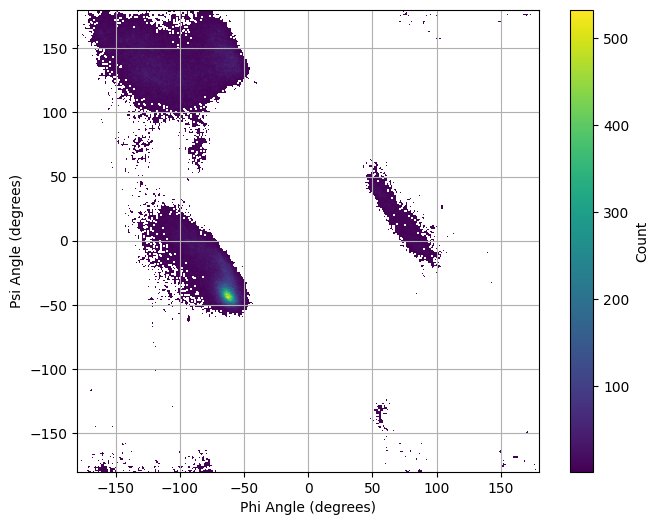

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Calculate histogram
hist, xedges, yedges = np.histogram2d(all_phi_angles, all_psi_angles, bins=600)

# Find areas with frequencies less than 1,
# and set the coordinate values corresponding to these areas to NaN
hist_masked = np.ma.masked_where(hist < 1, hist)

# Ramachandran plot
plt.figure(figsize=(8, 6), facecolor='white')
plt.imshow(hist_masked.T, extent=[
    xedges.min(), xedges.max(), yedges.min(), yedges.max()],
           origin='lower', cmap='viridis')

# Add color bar, label, title, coordinate grid
plt.colorbar(label='Count')
plt.xlabel('Phi Angle (degrees)')
plt.ylabel('Psi Angle (degrees)')
plt.xlim(-180, 180)
plt.ylim(-180, 180)
plt.grid(True)
plt.show()

### Calculate the resolution value of Dataset_1

In [51]:
# a list to store high-resolution values
high_resolution_values = []

#Define function to extract resolution value
def extract_resolution(structure):
    return structure.resolution

# Use gemmi.CoorFileWalk to traverse all PDB files in the folder
for path in tqdm(gemmi.CoorFileWalk(pdb_directory), total=len(pdb_list)):
    # Parse the PDB file and obtain structural information
    structure = gemmi.read_structure(path)
    # Extract resolution information
    resolution = extract_resolution(structure)
    if resolution:
        high_resolution_values.append(resolution)

  0%|          | 0/1611 [00:00<?, ?it/s]

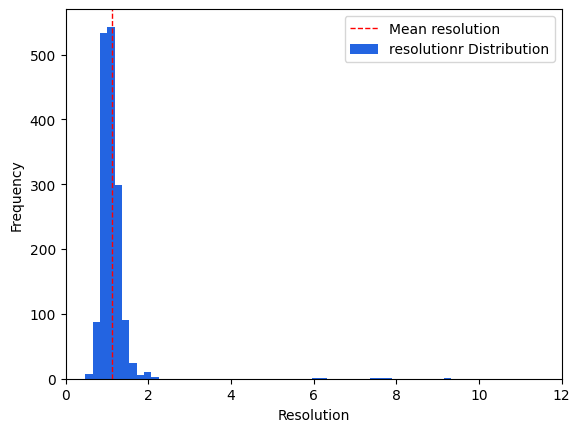

Average resolution: 1.113712704020691
Percentage in interval [0, 2]: 99.44%
Variance: 0.1935755037065802


In [52]:
import numpy as np

# High resolution average
avg_resolution = np.mean(high_resolution_values)

custom_color = [(35/255, 100/255, 225/255)]
plt.hist(high_resolution_values, bins=50, color=custom_color)
plt.axvline(avg_resolution, color='red', linestyle='dashed', linewidth=1)
plt.xlabel('Resolution')
plt.ylabel('Frequency')
plt.xlim(0, 12)
plt.legend(['Mean resolution', 'resolutionr Distribution'])
plt.show()
print("Average resolution:", avg_resolution)

# Calculate the frequency proportion within the interval [0, 100]
high_resolution_values_np = np.array(high_resolution_values) # Convert list to NumPy array
interval_start = 0
interval_end = 2
indices = np.where((high_resolution_values_np>= interval_start) & (high_resolution_values_np <= interval_end))[0]
frequency_in_interval = len(indices)
total_frequency = len(high_resolution_values_np)
percentage_in_interval = frequency_in_interval / total_frequency * 100
print(f"Percentage in interval [{interval_start}, {interval_end}]: {percentage_in_interval:.2f}%")

# Use the np.var() function to calculate the variance of the data
variance = np.var(high_resolution_values)
print("Variance:", variance)

### Calculate the B-Fcator value of Dataset_1

In [ ]:
b_factors = []

# Get all file paths in the folder
file_paths = [os.path.join(pdb_directory, file_name) for
              file_name in os.listdir(pdb_directory) if
              file_name.endswith(".cif")]

# Use tqdm to wrap the iteration object to display the progress bar
for file_path in tqdm(file_paths, desc="Processing files"):
    # Parse CIF files
    doc = gemmi.cif.read(file_path)
    structure = gemmi.read_structure(file_path)
    #Extract B factor
    for model in structure:
        for chain in model:
            for residue in chain:
                for atom in residue:
                    b_factors.append(atom.b_iso)

Processing files:   0%|          | 0/1611 [00:00<?, ?it/s]

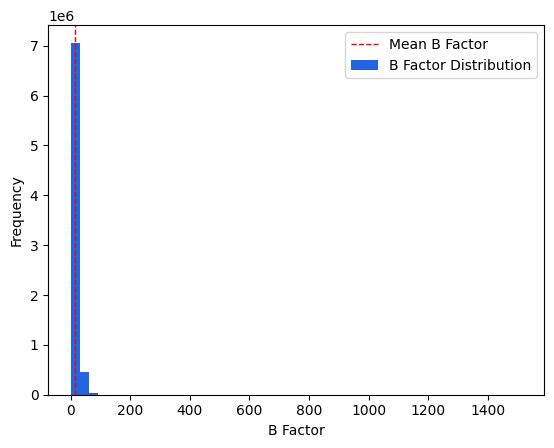

Average B Factor: 15.56955363891087
Percentage in interval [0, 100]: 99.75%


In [ ]:
# Calculate the average B factor value
avg_b_factor = np.mean(b_factors)

custom_color = [(35/255, 100/255, 225/255)]
plt.hist(b_factors, bins=50, color=custom_color)
plt.axvline(avg_b_factor, color='red', linestyle='dashed', linewidth=1)
plt.xlabel('B Factor')
plt.ylabel('Frequency')
plt.legend(['Mean B Factor', 'B Factor Distribution'])
plt.show()

print("Average B Factor:", avg_b_factor)

# Calculate the frequency proportion within the interval [0, 100]
b_factors_np = np.array(b_factors)  # Convert list to NumPy array
interval_start = 0
interval_end = 100
indices = np.where((b_factors_np>= interval_start) & (b_factors_np <= interval_end))[0]
frequency_in_interval = len(indices)
total_frequency = len(b_factors)
percentage_in_interval = frequency_in_interval / total_frequency * 100
print(f"Percentage in interval [{interval_start}, {interval_end}]: {percentage_in_interval:.2f}%")

### Calculate the peptide bond torsion angle of Dataset_1

In [ ]:
from math import degrees, isnan, pi
import numpy as np

trans_omega_angles = [ ]
cis_omega_angles = [ ]
high_sol_resolution_values = [ ]

for path in tqdm(gemmi.CoorFileWalk(pdb_directory), total=len(pdb_list)) :
  structure = gemmi.read_structure(path)
  model = structure[0]
  high_sol_resolution_values.append( structure.resolution )

  for chain in model :
    for residue in chain :
      next_res = chain.next_residue ( residue )
      if next_res:
        omega = gemmi.calculate_omega(residue, next_res)
        if not isnan(degrees(omega)):
          if omega < 0.0 :
            omega = omega + 2*pi
          if omega < 0.5 :
            cis_omega_angles.append ( degrees ( omega ) )
          else :
            trans_omega_angles.append ( degrees ( omega ) )

  0%|          | 0/1611 [00:00<?, ?it/s]


Here is the graph for trans peptide bonds:



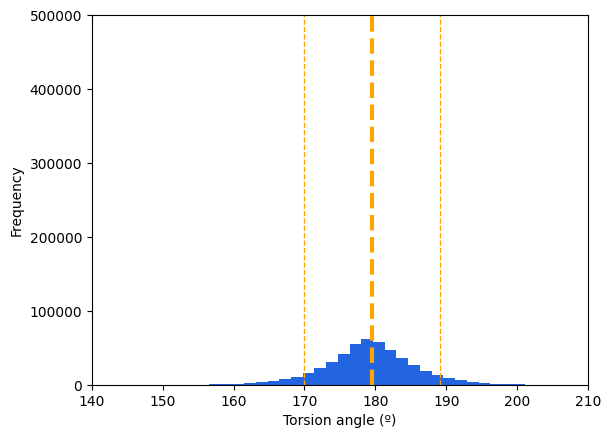


And here is the graph for cis bonds:



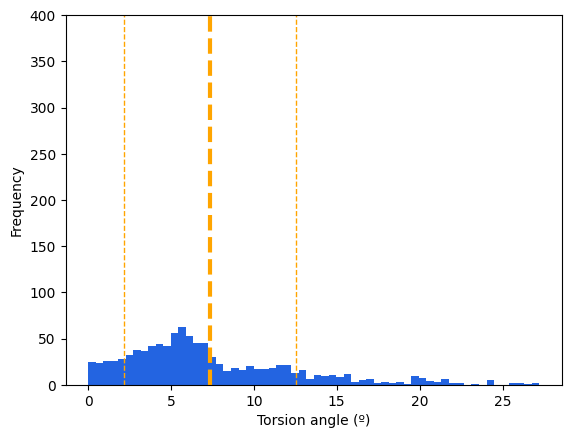


Trans peptide bonds account for 99.80% of the dataset, with an average of 179.47 and a standard deviation of 9.60.
  Cis peptide bonds account for 0.20% of the dataset, with an average of 7.35 and a standard deviation of 5.19.


In [ ]:
print("\nHere is the graph for trans peptide bonds:\n")

custom_color = [(35/255, 100/255, 225/255)]
plt.hist(trans_omega_angles, color = custom_color, bins=200)
plt.xlabel("Torsion angle (º)")
plt.ylabel("Frequency")
plt.axvline(np.average(trans_omega_angles), color='orange', linestyle='dashed',\
            linewidth=3)
plt.axvline(np.average(trans_omega_angles) - np.std(trans_omega_angles), \
            color='orange', linestyle='dashed', linewidth=1)
plt.axvline(np.average(trans_omega_angles) + np.std(trans_omega_angles), \
            color='orange', linestyle='dashed', linewidth=1)
plt.xlim(140,210)
plt.ylim(0, 500000)
plt.show ( )

print ("\nAnd here is the graph for cis bonds:\n")

plt.hist(cis_omega_angles, color = custom_color, bins=60)
plt.xlabel("Torsion angle (º)")
plt.ylabel("Frequency")
plt.axvline(np.average(cis_omega_angles), color='orange', linestyle='dashed',\
            linewidth=3)
plt.axvline(np.average(cis_omega_angles) - np.std(cis_omega_angles), \
            color='orange', linestyle='dashed', linewidth=1)
plt.axvline(np.average(cis_omega_angles) + np.std(cis_omega_angles), \
            color='orange', linestyle='dashed', linewidth=1)
plt.ylim(0, 400)
plt.show ( )


print ("\nTrans peptide bonds account for {:0.2f}% of the dataset, " \
       "with an average of {:0.2f} and a standard deviation of {:0.2f}." \
       .format((len(trans_omega_angles)/(len(trans_omega_angles)+ \
       len(cis_omega_angles)))*100.0, np.average(trans_omega_angles), \
       np.std(trans_omega_angles) ))

print ("  Cis peptide bonds account for {:0.2f}% of the dataset, " \
       "with an average of {:0.2f} and a standard deviation of {:0.2f}." \
       .format((len(cis_omega_angles)/(len(trans_omega_angles)+ \
       len(cis_omega_angles)))*100.0, np.average(cis_omega_angles), \
       np.std(cis_omega_angles) ))

## Analysis of Dataset_2

In [ ]:
import os
import matplotlib.pyplot as plt
from math import degrees, isnan
from Bio.PDB import PDBParser
from tqdm.notebook import tqdm
import gemmi

pdb_codes_2 = "1A0I,1A37,1A38,1A3X,1A4O,1A8J,1ADV,1AF5,1AN0,1AR2,1AU0,1AU3,1AU4,1AUE,1AV1,1AWQ,1AWR,1AWS,1AWT,1AWU,1AWV,1AYW,1AZ4,1B07,1B1B,1B55,1B98,1BG5,1BGY,1BI2,1BKX,1BQM,1BQN,1BR4,1BRE,1BVR,1BX6,1BY8,1C16,1C1A,1C2B,1C2O,1C6V,1CN4,1D9Y,1D9Z,1DCM,1DDH,1DEQ,1DFK,1DFL,1DLO,1DO0,1DPR,1DQU,1DQV,1DTE,1DXS,1E3K,1E4K,1EBP,1EDZ,1EE9,1EFG,1EG6,1EQQ,1EWR,1EXN,1F1O,1F4Y,1FAG,1FBZ,1FCC,1FFX,1FHE,1FOC,1FOU,1FP7,1FQY,1FX0,1FZA,1G0I,1G4B,1G65,1G8O,1GGM,1GRL,1GRZ,1GUB,1H3X,1H3Y,1H6I,1H7O,1HEK,1HGV,1HGZ,1HH0,1HH6,1HNV,1HPZ,1HQM,1HQU,1HUL,1HVU,1HWO,1I1G,1I38,1I6V,1I9W,1IFP,1IH5,1INR,1IWG,1IXR,1IYL,1IYW,1J0B,1J5O,1JD2,1JH7,1JHN,1JII,1JJK,1JL4,1JLE,1JPW,1JQ7,1JSW,1JV2,1JWH,1K3O,1K58,1K98,1KMN,1KOA,1KOH,1KOO,1KT0,1KTK,1KTV,1L4A,1LDP,1LEP,1LFB,1LIL,1LO5,1LP3,1M3J,1M54,1ME5,1MU0,1N7D,1N8E,1N8P,1N95,1N9A,1NDI,1NF1,1NFK,1NIK,1O6C,1O95,1ODG,1OEK,1OHG,1OTT,1OWI,1OWJ,1OY9,1OYD,1P51,1P6V,1P93,1P9M,1P9X,1PP6,1PV6,1PXT,1PYH,1QAB,1QCR,1QE1,1QL1,1QNV,1QPL,1QTJ,1QU3,1QZL,1QZU,1QZV,1QZW,1QZX,1R1I,1R49,1R4L,1R5U,1R6G,1R7R,1R9S,1RHQ,1RKC,1RPQ,1RQ9,1RRW,1RSI,1RT3,1RT6,1RT7,1RV7,1RXT,1RY7,1RYX,1S5L,1S94,1S9I,1SFO,1SGH,1SKN,1SL0,1SLQ,1SM1,1SMJ,1SOR,1ST6,1SVW,1SZ1,1T39,1T9T,1T9U,1T9W,1T9X,1T9Y,1TCF,1TDJ,1TF6,1TJR,1TS7,1TS8,1TVE,1U68,1U8C,1UDU,1UT5,1UVH,1UWB,1UWJ,1V5W,1V9I,1VCR,1VF5,1VI1,1VIS,1W0C,1W1Z,1W2O,1W5G,1W5H,1W77,1WCS,1WIO,1WIP,1WIQ,1WK2,1XAM,1XBP,1XD4,1XDL,1XDV,1XI8,1XQY,1XWM,1XXB,1XXC,1XXH,1XXI,1Y69,1YAE,1YE1,1YI5,1YNJ,1YR9,1YT9,1YTZ,1YV0,1YY3,1YYF,1YZE,1Z56,1Z58,1Z9J,1Z9X,1ZFF,1ZFG,1ZFH,1ZFM,1ZN2,239D,2A0L,2A1B,2A2E,2A2T,2A4F,2A4Z,2A5U,2A62,2A64,2ADU,2AF1,2AG9,2ARA,2ATQ,2AZJ,2B26,2B35,2B4C,2B8V,2BAP,2BBJ,2BBZ,2BF1,2BS8,2BSX,2BZX,2C32,2C4R,2C6S,2C9N,2CA0,2CAZ,2CBT,2CD0,2CDE,2CG9,2CHV,2CJF,2CWJ,2CXL,2D2C,2D57,2DH1,2DHR,2DR6,2DSQ,2DU7,2DWN,2E2H,2EFD,2EG9,2EMO,2ES7,2EXY,2F7Z,2FEO,2FIX,2FJ7,2FO1,2FSN,2FXO,2FXT,2G01,2G1Z,2G33,2G4N,2GFP,2GHO,2GMX,2GSZ,2GYR,2H6O,2H8A,2H8K,2HI7,2HMI,2HOD,2HPC,2HSG,2HTQ,2HTT,2HYG,2I35,2I36,2I37,2I6W,2IEY,2IEZ,2IF4,2INY,2IOP,2IOQ,2IV8,2J42,2J7O,2JET,2JH8,2JK4,2JLE,2NN6,2NP9,2NQM,2NR0,2NRE,2NTZ,2NYL,2O01,2O43,2O45,2OAR,2OGM,2OGN,2OGO,2OQ4,2OTO,2OY0,2OZR,2P0Y,2P1I,2P3G,2PFF,2PG8,2PMZ,2PRO,2PXQ,2PZX,2Q11,2Q15,2Q2E,2QAG,2QLD,2R1A,2R5J,2R62,2R69,2R6C,2R6E,2R7E,2REJ,2RFC,2UZU,2V1C,2V5D,2V9R,2VG6,2VGL,2VRT,2VSK,2VYE,2W1B,2W1F,2W2V,2W2W,2W5J,2W6F,2WAQ,2WB1,2WJX,2WRD,2WRF,2WS0,2WSC,2WSE,2WSF,2X0B,2X1X,2XAC,2XHX,2XNY,2XPE,2XRU,2Y0S,2Y8I,2Y9E,2YAL,2YEI,2YEJ,2YJH,2YU9,2YV3,2YVX,2YVZ,2YXR,2Z17,2Z1B,2Z2E,2Z41,2Z93,2ZFK,2ZIX,2ZJB,2ZJP,2ZJQ,2ZP2,2ZQP,2ZUP,2ZUQ,2ZW3,2ZWK,3A0B,3A0R,3A2C,3A44,3A59,3A5C,3A5D,3A61,3A8N,3ALN,3ALZ,3AMY,3AOC,3AOI,3AP3,3ATB,3AYM,3B1K,3B2V,3B5D,3B5X,3B5Y,3B5Z,3B60,3B61,3B62,3B6F,3B6G,3BBW,3BDN,3BGW,3BKU,3BOA,3BQ4,3BVD,3BVQ,3BX3,3BXX,3CHG,3CHX,3CII,3CPZ,3CRC,3CS5,3D0M,3D45,3D62,3D69,3D9B,3DHW,3DHY,3DKW,3DL8,3DPR,3DV4,3DWB,3DWL,3DYU,3E3J,3E9J,3ER0,3EWE,3F7A,3F9V,3FBR,3FH6,3FIP,3FNT,3FPM,3FPP,3FRT,3FRV,3FUS,3FWO,3FY8,3FYJ,3G5U,3G60,3G61,3G75,3GA0,3GIG,3GKQ,3GLH,3GOJ,3GOM,3GQK,3GQU,3GTQ,3GU0,3H0A,3H4V,3HAY,3HGF,3HKZ,3HQQ,3HWN,3I0Q,3I4R,3I50,3I5H,3I8E,3IDQ,3IGD,3JYM,3K6S,3K71,3K72,3KCY,3KGV,3KIN,3KLG,3KPD,3KRN,3KYM,3KZ4,3L5H,3LAQ,3LG8,3LGO,3LHP,3LJR,3LSE,3LTG,3LVG,3LVH,3LW5,3M0C,3M1B,3M51,3M8L,3ME1,3MKT,3MKU,3ML6,3MLV,3MPW,3MVL,3MW1,3N6K,3N7N,3NFF,3NGR,3NJT,3NSG,3NYJ,3O50,3O5D,3OA9,3ODK,3OJY,3OMV,3OPO,3OQ9,3OS3,3OWY,3OX9,3P3W,3P56,3P5C,3PAW,3PDI,3PGW,3PN5,3PSD,3PXI,3QA8,3QAZ,3QBN,3QCR,3QDZ,3QIL,3QJR,3QMZ,3QPR,3QRX,3QS9,3R0A,3R2A,3R2Y,3REQ,3RIU,3RJ1,3RL0,3RY6,3RYT,3RZF,3S33,3S39,3S3C,3S4D,3S4G,3S6K,3S7Y,3SJD,3SKG,3SR2,3SWL,3SWP,3SYV,3T1X,3TB8,3TIR,3TQB,3TRW,3TTI,3TW4,3U59,3U82,3UA0,3UKI,3ULA,3URO,3US2,3USV,3UU2,3UVF,3UWX,3UZA,3V0C,3V11,3V4W,3V7L,3VI0,3VLB,3VLC,3VQK,3VUT,3VZJ,3W03,3W12,3W13,3W39,3W3A,3W4K,3WC1,3WKV,3WMM,3WS9,3X1D,3ZO6,3ZRC,3ZRY,3ZTE,456C,4A0A,4AC5,4AD8,4AGE,4AGF,4AK3,4ANI,4ANU,4AOF,4ASO,4ASS,4AU5,4AV6,4B2T,4B3P,4B3Q,4BBE,4BBV,4BGN,4BK4,4BKA,4BKF,4BM5,4BSK,4BWB,4BXS,4C8F,4C8U,4C9E,4C9V,4CDI,4CKZ,4CPX,4D0M,4D2T,4D2V,4DK0,4DK1,4DT0,4DUL,4DX0,4DYT,4E4K,4E5I,4E8V,4ECK,4EEB,4EED,4EJX,4EQ5,4F9P,4FBY,4FCY,4FDG,4FF9,4FHM,4FHN,4FQR,4FQV,4FQY,4FR2,4FS0,4FZ5,4G0H,4G11,4G93,4GB3,4GFA,4GPO,4GQ9,4GRG,4GWP,4GWQ,4H37,4HAG,4HBO,4HF8,4HFO,4HL8,4HPQ,4HRM,4HTT,4HUK,4HUL,4HVB,4HVR,4HYC,4HYG,4I39,4I3A,4I5M,4I6H,4I9K,4IDU,4IDX,4IFN,4IH4,4IIA,4IIT,4IM8,4IWP,4J23,4JIO,4JNT,4JS5,4JSC,4JUP,4KR4,4KR8,4KRA,4KSB,4KSC,4KSD,4KSR,4KSS,4KZX,4KZY,4KZZ,4L67,4L6R,4L7K,4LDI,4LDS,4LH9,4LJB,4LPU,4LQL,4LSG,4M4W,4M64,4M9S,4M9X,4MHJ,4MJN,4MSE,4MT1,4MVD,4N71,4N99,4NA0,4NCO,4NDL,4NHG,4NHH,4NKO,4NWN,4NYL,4OIU,4OJ9,4OM2,4OQA,4OQB,4OVV,4OXD,4P7S,4PA6,4PB6,4PVV,4PZO,4Q2E,4Q9U,4QFF,4R1I,4R45,4R48,4R9Y,4RHB,4RL5,4RN6,4RVW,4RYJ,4S20,4TTH,4TYI,4TZP,4U4A,4UF5,4UIL,4UNH,4UNX,4UP6,4UV3,4UW0,4UX1,4UX2,4UXV,4UZV,4V0U,4V2A,4V2C,4V2E,4V49,4V4A,4V4G,4V4I,4V4J,4V4P,4V4R,4V4S,4V4T,4V4Z,4V7R,4V81,4V8K,4V8O,4W69,4W6N,4W6R,4W75,4WHV,4WIJ,4WRM,4WZ7,4XE5,4XJV,4XM0,4XMM,4XMN,4XOU,4XRS,4XXE,4Y1K,4Y49,4Y6K,4Y7J,4YCZ,4YEB,4YG7,4YXK,4YXY,4Z2Y,4Z7F,4ZIT,4ZIV,4ZIW,4ZJA,4ZJD,4ZPR,4ZSV,4ZZQ,5AFR,5AFX,5AIX,5AKB,5AOQ,5AWG,5B00,5B2M,5B4M,5BJT,5BN7,5BNG,5BUT,5C35,5C51,5C53,5C6E,5C6H,5CCE,5CCG,5CJQ,5COD,5CTR,5CW9,5CZJ,5D0Q,5D10,5D12,5D1Y,5D2L,5D5G,5D7L,5D9A,5D9Z,5DFZ,5DGY,5DJW,5DLZ,5DOQ,5DQQ,5E6I,5E9U,5EBJ,5EF5,5EHB,5EKV,5ENY,5EPT,5ERA,5ERB,5EWB,5EYQ,5EZK,5F5V,5F7C,5F8U,5FHC,5FHH,5FMO,5FWW,5GNU,5GTR,5GUG,5GXB,5H1Z,5H4D,5H5C,5H8O,5HA9,5HB1,5HD5,5HIY,5HIZ,5HMO,5HOT,5HQ2,5I1G,5I1I,5I7D,5I87,5IPN,5IV9,5IZK,5J68,5J96,5JQU,5JQZ,5JWQ,5K8D,5K98,5K9O,5KC7,5KWG,5L25,5L3T,5L5G,5L5K,5L5L,5L5M,5L5N,5LE3,5LKF,5LM7,5LNL,5LOJ,5LOO,5LUQ,5M5P,5MBS,5MLF,5N09,5N4W,5NBD,5NV8,5NWT,5NX2,5O1O,5O4W,5O68,5O9K,5OCW,5OFP,5OID,5OR1,5OXV,5PPR,5PRK,5PRL,5PRM,5PSH,5PW5,5PW6,5PYI,5PYS,5PYT,5PZ5,5Q3B,5Q45,5Q4C,5Q4F,5Q4V,5Q5N,5Q5Y,5Q7J,5Q7X,5Q8E,5Q8H,5Q8J,5Q8Q,5Q8S,5QK0,5R0G,5R0Y,5R1O,5RDH,5RE3,5ROC,5ROE,5ROS,5ROZ,5RPO,5ST5,5STW,5SU4,5SU7,5SUQ,5SWE,5SY7,5SYS,5T23,5T58,5T8N,5TBZ,5TE5,5TEH,5TLJ,5TOI,5TUJ,5U2H,5UI5,5UJ8,5UKB,5V2A,5V7J,5VG9,5VK1,5VVM,5W4V,5WDU,5WII,5WIO,5X41,5X4Z,5X51,5X9Z,5XA0,5XA1,5XAM,5XFJ,5XMB,5XNX,5Y2D,5YHL,5ZAC,5ZF0,5ZLH,5ZUL,5ZUT,5ZXV,6AA9,6AF3,6AJ5,6AJN,6AKI,6B0B,6B0N,6B6O,6BBF,6BBG,6BBH,6BBO,6BH8,6BK9,6BKJ,6BN8,6BNB,6BPE,6BXF,6C4X,6C6O,6C8F,6C8G,6C8H,6C9T,6CCB,6CE0,6CGV,6CHB,6CLS,6CPG,6CTD,6CX0,6D3L,6D79,6DGU,6DMA,6DO1,6DZF,6EB8,6EK8,6EOQ,6ERQ,6EWN,6F1H,6F39,6F5N,6FBK,6FEY,6FGZ,6FOC,6FOS,6FQ4,6FRV,6FV7,6FWF,6G57,6GHF,6GLX,6GMX,6GNN,6H2D,6H8K,6HDA,6HI3,6HR5,6HU5,6HUF,6HXB,6IFX,6IGC,6IJI,6ILZ,6IQ5,6IQK,6IQL,6IU4,6IUE,6IVA,6IVW,6IW0,6IZ3,6IZ6,6J07,6J4A,6J6F,6JIV,6JLR,6JN2,6JOB,6JPS,6JRP,6JXK,6K5H,6K6S,6KA7,6KD3,6KED,6KEF,6KO1,6KOB,6KOC,6KOE,6KXG,6L3A,6LHM,6LKN,6LKW,6LL9,6LOY,6LP3,6M2L,6M98,6MAF,6N5G,6N62,6N9O,6NA6,6NCU,6NDE,6NIU,6NKK,6O30,6O8D,6OPA,6OWW,6P4I,6PFY,6PGK,6PX9,6QF5,6QF7,6QHD,6QIM,6QPH,6QRZ,6QT5,6QT6,6QU1,6QX5,6QZV,6RCU,6RPH,6RQ7,6RRE,6RSB,6RSU,6RTZ,6S1Z,6S2P,6S39,6S5U,6SIT,6SLE,6SS6,6SSR,6T4H,6TK1,6TK3,6TTL,6TY1,6UBF,6UHP,6UKO,6ULT,6UN9,6UOW,6UT3,6UTV,6UTX,6UTY,6UTZ,6UU0,6UU1,6UU2,6UU3,6UU4,6UU5,6UU6,6UU7,6UU8,6UU9,6UUA,6UUB,6UUC,6V6W,6VKQ,6VVW,6W2C,6W84,6WIZ,6WSM,6WY1,6X03,6X06,6X08,6X8X,6XF2,6XNM,6XU4,6Y2S,6Y9T,6YEK,6YES,6YQF,6YRA,6YUE,6YXJ,6Z2I,6Z3M,6Z42,6Z46,6Z71,6ZNS,6ZQO,6ZTA,6ZTH,7A0G,7B1N,7BVX,7BW2,7BWG,7BYQ,7BZ6,7C2W,7CHD,7CHV,7CI6,7CI8,7CJN,7CK4,7CM0,7CR8,7CRI,7CRT,7CS8,7D9M,7DCD,7DI8,7DN4,7DNB,7DWS,7DY9,7DYE,7E1I,7E6X,7E6Y,7E6Z,7E70,7E71,7E7L,7E7W,7EGY,7EK7,7ESG,7EWH,7EWT,7F0I,7FF7,7FOH,7FOR,7FOZ,7FSN,7FSS,7FST,7FSZ,7FT4,7FTD,7JNE,7JR5,7JRI,7JZT,7K02,7K17,7KBT,7KGN,7KLC,7KNW,7KQI,7KWF,7KZB,7LER,7M78,7MZT,7N0V,7NA1,7NK0,7NPD,7NWO,7NX5,7O3L,7O3M,7O3N,7O60,7O8G,7O8K,7O8Q,7O8R,7OGZ,7P4A,7P8J,7PB8,7PDV,7PG8,7PGH,7PK5,7PPI,7PPP,7PZB,7QHN,7QLN,7QLO,7QY9,7QYG,7QYH,7R22,7R34,7R35,7R36,7ROL,7RVV,7S50,7S8T,7SDO,7SPL,7SPZ,7SVL,7SVN,7SVX,7T00,7T8I,7TDW,7TE1,7TEP,7TGA,7TUM,7U8J,7U8M,7UL8,7URZ,7V3X,7VGE,7VI5,7VLN,7VT9,7W7I,7WI7,7WMZ,7WYF,7X2P,7X7O,7XI4,7XIN,7XKJ,7XNF,7XWW,7XXE,7XYZ,7YHD,7YHJ,7YIT,7YJC,7YYV,7YYW,7YYX,7YYY,7YYZ,7YZ0,7YZ1,7YZ2,7Z04,7Z1I,7Z7K,7Z7W,7Z81,7ZA1,7ZA2,7ZA3,7ZAN,7ZCM,7ZF4,7ZFD,7ZLN,7ZMP,7ZQM,7ZUD,8A4R,8A6C,8A6D,8A6E,8AJ8,8ARD,8AXP,8B23,8B24,8B93,8BAL,8BCH,8BD8,8BD9,8BDY,8BK6,8BS7,8BWF,8CAR,8CL8,8CN9,8CU1,8CU2,8CU3,8CU4,8CWS,8D50,8DB9,8DDK,8DEY,8DFX,8DW9,8DX5,8E1E,8EB0,8EG4,8EI2,8EIA,8ENF,8EOX,8EZT,8F09,8F22,8FBO,8FLX,8G50,8H2R,8H2U,8H6T,8HB5,8HPY,8HUZ,8HVJ,8HZ1,8HZ2,8I5I,8I8Y,8IAY,8IDF,8JAI,8K6Y,8OFP,8OO4,8OY3,8OY4,8OY5,8OY6,8OY7,8OY8,8OY9,8OYA,8OYB,8OYC,8PCW,8PEI,8PPN,8PQN,8Q2M,8QFI,8QFJ,8QHM,8QPC,8RCQ,8SPZ,8SSN,8TLC,8TNO,8TWS,8U0G,8U17,8UGC,8V1L,8WV8,8WVE,8X2T,9ATC"
pdb_list_2 = pdb_codes_2.split(',')

pdb_directory_2 = '/content/drive/MyDrive/Assessment/Chemistry/download/data2'

### Generate the Ramachandran plot of Dataset_2

In [ ]:
# Store dihedral data of all PDB files
all_phi_angles_2 = []
all_psi_angles_2 = []

for path in tqdm(gemmi.CoorFileWalk(pdb_directory_2), total=len(pdb_list_2)) :
    structure2 = gemmi.read_structure(path)
    model2 = structure2[0]

    # Calculate dihedral angle data
    phi_angles_2 = []
    psi_angles_2 = []
    for chain in model2:
        for residue in chain:
            next_res = chain.next_residue(residue)
            prev_res = chain.previous_residue(residue)
            if next_res:
                phi, psi = gemmi.calculate_phi_psi(prev_res, residue, next_res)
                if not isnan(phi) and not isnan(psi):
                    phi_angles_2.append(degrees(phi))
                    psi_angles_2.append(degrees(psi))

        # Add to the dihedral data list of all PDB files
        all_phi_angles_2.extend(phi_angles_2)
        all_psi_angles_2.extend(psi_angles_2)

  0%|          | 0/1672 [00:00<?, ?it/s]

In [ ]:
print(len(all_phi_angles_2))
print(len(all_psi_angles_2))

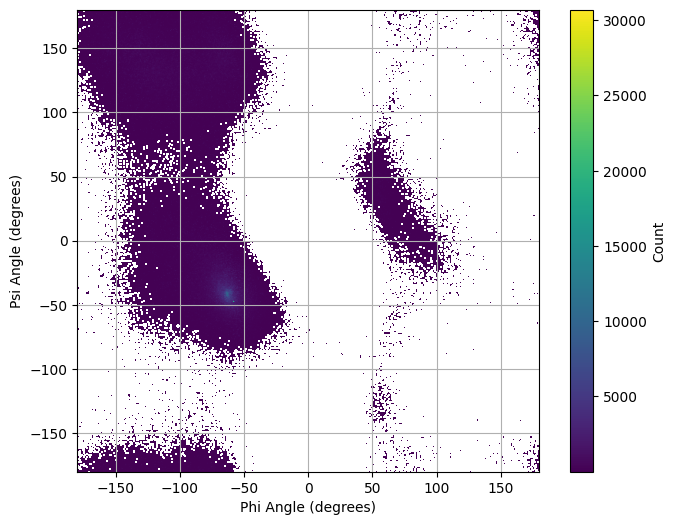

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Calculate histogram
hist, xedges, yedges = np.histogram2d(all_phi_angles_2, all_psi_angles_2, bins=600)

# Find areas with frequencies less than 1, and set the coordinate values corresponding to these areas to NaN
hist_masked = np.ma.masked_where(hist < 1, hist)

# Ramachandran plot
plt.figure(figsize=(8, 6), facecolor='white')
plt.imshow(hist_masked.T, extent=[xedges.min(), xedges.max(), yedges.min(), yedges.max()], origin='lower', cmap='viridis')

# Add colorbar, label and title
plt.colorbar(label='Count')
plt.xlabel('Phi Angle (degrees)')
plt.ylabel('Psi Angle (degrees)')
plt.xlim(-180, 180)
plt.ylim(-180, 180)
plt.grid(True)
plt.show()

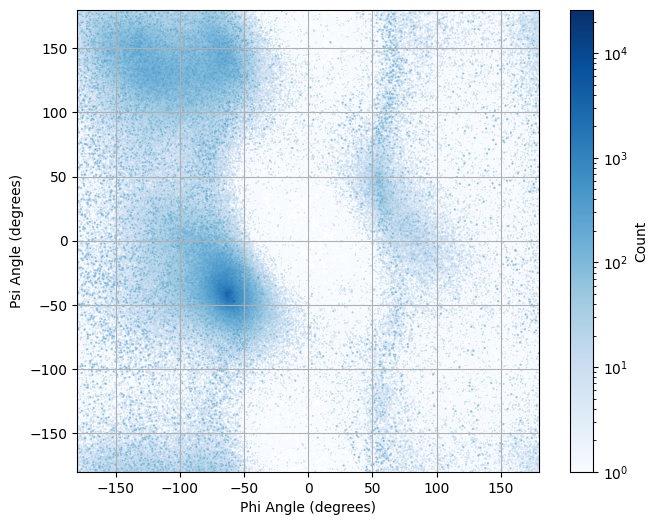

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# 计算直方图
hist_2, xedges, yedges = np.histogram2d(all_phi_angles_2, all_psi_angles_2, bins=1000)

# 绘制 Ramachandran 图
plt.figure(figsize=(8, 6), facecolor='white')  # 设置背景色为白色

# 绘制直方图
plt.imshow(hist_2.T, extent=[
    xedges.min(), xedges.max(), yedges.min(), yedges.max()],
          origin='lower', cmap='Blues', interpolation='gaussian', norm='log')
# 添加颜色条
plt.colorbar(label='Count')

# 设置标签和标题
plt.xlabel('Phi Angle (degrees)')
plt.ylabel('Psi Angle (degrees)')

# 设置坐标范围和网格
plt.xlim(-180, 180)
plt.ylim(-180, 180)
plt.grid(True)
plt.show()

### Calculate the resolution value of Dataset_2

In [ ]:
high_resolution_values_2 = []

#Define function to extract resolution information
def extract_resolution(structure):
    return structure.resolution

# Use gemmi.CoorFileWalk to traverse all PDB files in the folder
for path in tqdm(gemmi.CoorFileWalk(pdb_directory_2), total=len(pdb_list_2)):
    # Parse the PDB file and obtain structural information
    structure = gemmi.read_structure(path)
    resolution = extract_resolution(structure)
    if resolution:
        high_resolution_values_2.append(resolution)

  0%|          | 0/1672 [00:00<?, ?it/s]

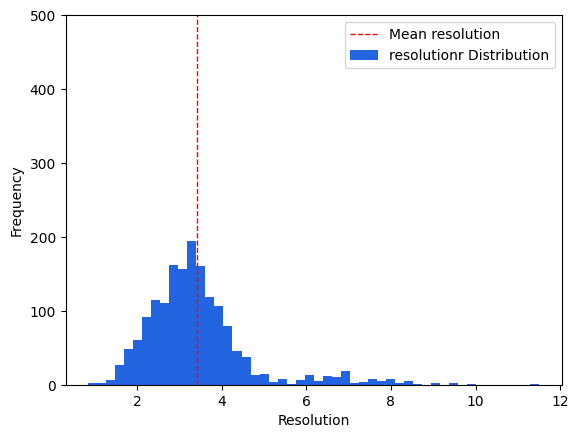

Average resolution: 3.430271289532548
Percentage in interval [2, 4]: 75.12%
Variance: 1.5914528095845284


In [ ]:
import numpy as np

# High resolution average
avg_resolution_2 = np.mean(high_resolution_values_2)

custom_color = [(35/255, 100/255, 225/255)]
plt.hist(high_resolution_values_2, color = custom_color, bins=50)
plt.axvline(avg_resolution_2, color='red', linestyle='dashed', linewidth=1)
plt.xlabel('Resolution')
plt.ylabel('Frequency')
plt.ylim(0, 500)
# plt.title(' Resolution')
plt.legend(['Mean resolution', 'resolutionr Distribution'])
plt.show()

print("Average resolution:", avg_resolution_2)

# Calculate the frequency proportion within the interval [0, 100]
high_resolution_values_2_np = np.array(high_resolution_values_2)  # Convert list to NumPy array
interval_start = 2
interval_end = 4
indices = np.where((high_resolution_values_2_np>= interval_start) & (high_resolution_values_2_np <= interval_end))[0]
frequency_in_interval = len(indices)
total_frequency = len(high_resolution_values_2_np)
percentage_in_interval = frequency_in_interval / total_frequency * 100
print(f"Percentage in interval [{interval_start}, {interval_end}]: {percentage_in_interval:.2f}%")
# Use the np.var() function to calculate the variance of the data
variance = np.var(high_resolution_values_2)

print("Variance:", variance)

### Calculate the B-Fcator value of Dataset_2

In [ ]:
b_factors_2 = []

# Get all file paths in the folder
file_paths = [os.path.join(pdb_directory_2, file_name) for
              file_name in os.listdir(pdb_directory_2) if
              file_name.endswith(".cif")]

# Use tqdm to wrap the iteration object to display the progress bar
for file_path in tqdm(file_paths, desc="Processing files"):
    # Parse CIF files
    doc = gemmi.cif.read(file_path)
    structure = gemmi.read_structure(file_path)
    #Extract B factor
    for model in structure:
        for chain in model:
            for residue in chain:
                for atom in residue:
                    b_factors_2.append(atom.b_iso)

Processing files:   0%|          | 0/1672 [00:00<?, ?it/s]

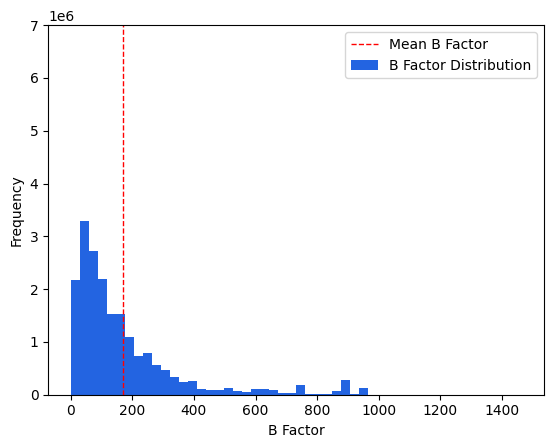

Average B Factor: 169.66283212554205
Percentage in interval [0, 100]: 47.60%


In [ ]:
# Calculate the average B factor value
avg_b_factor_2 = np.mean(b_factors_2)

plt.hist(b_factors_2, bins=50, color=custom_color, edgecolor='none')
plt.axvline(avg_b_factor_2, color='red', linestyle='dashed', linewidth=1)
plt.xlabel('B Factor')
plt.ylabel('Frequency')
plt.ylim(0, 7000000)
plt.legend(['Mean B Factor', 'B Factor Distribution'])
plt.show()

print("Average B Factor:", avg_b_factor_2)

# Calculate the frequency proportion within the interval [0, 100]
b_factors_2_np = np.array(b_factors_2)  # Convert list to NumPy array
interval_start = 0
interval_end = 100
indices = np.where((b_factors_2_np>= interval_start) & (b_factors_2_np <= interval_end))[0]
frequency_in_interval = len(indices)
total_frequency = len(b_factors_2)
percentage_in_interval = frequency_in_interval / total_frequency * 100
print(f"Percentage in interval [{interval_start}, {interval_end}]: {percentage_in_interval:.2f}%")

### Calculate the peptide bond torsion angle of Dataset_2

In [ ]:
from math import degrees, isnan, pi
import numpy as np

trans_omega_angles_2 = [ ]
cis_omega_angles_2 = [ ]

for path in tqdm(gemmi.CoorFileWalk(pdb_directory_2), total=len(pdb_list_2)) :
  structure = gemmi.read_structure(path)
  model = structure[0]
  high_sol_resolution_values.append( structure.resolution )

  for chain in model :
    for residue in chain :
      next_res = chain.next_residue ( residue )
      if next_res:
        omega = gemmi.calculate_omega(residue, next_res)
        if not isnan(degrees(omega)):
          if omega < 0.0 :
            omega = omega + 2*pi
          if omega < 0.5 :
            cis_omega_angles_2.append ( degrees ( omega ) )
          else :
            trans_omega_angles_2.append ( degrees ( omega ) )

  0%|          | 0/1672 [00:00<?, ?it/s]


Here is the graph for trans peptide bonds:



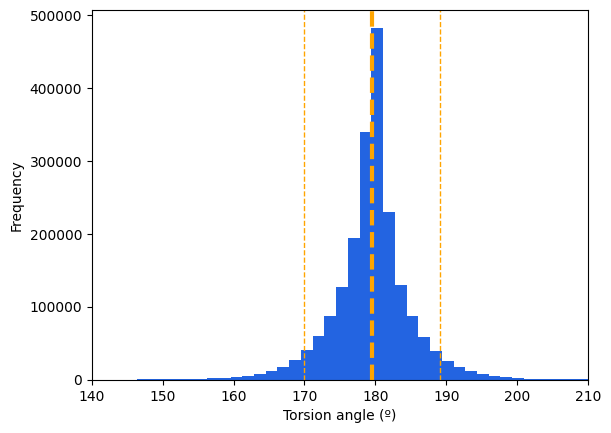


And here is the graph for cis bonds:



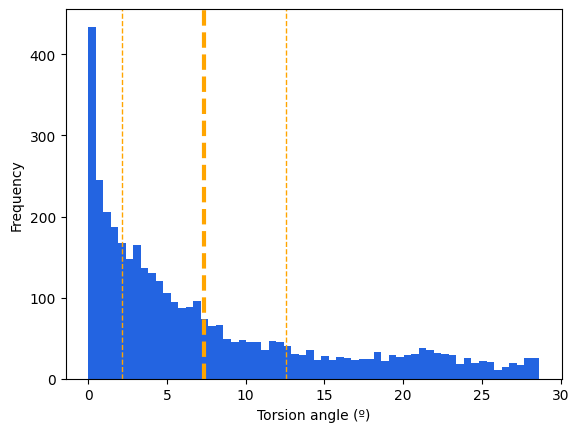


Trans peptide bonds account for 99.80% of the dataset, with an average of 179.47 and a standard deviation of 9.60.
  Cis peptide bonds account for 0.20% of the dataset, with an average of 7.35 and a standard deviation of 5.19.


In [ ]:
print("\nHere is the graph for trans peptide bonds:\n")

custom_color = [(35/255, 100/255, 225/255)]
plt.hist(trans_omega_angles_2, color =custom_color, bins=200)
plt.xlabel("Torsion angle (º)")
plt.ylabel("Frequency")
plt.axvline(np.average(trans_omega_angles), color='orange', linestyle='dashed',\
            linewidth=3)
plt.axvline(np.average(trans_omega_angles) - np.std(trans_omega_angles), \
            color='orange', linestyle='dashed', linewidth=1)
plt.axvline(np.average(trans_omega_angles) + np.std(trans_omega_angles), \
            color='orange', linestyle='dashed', linewidth=1)
plt.xlim(140,210)
plt.show ( )

print ("\nAnd here is the graph for cis bonds:\n")

plt.hist(cis_omega_angles_2, color = custom_color,bins=60)
plt.xlabel("Torsion angle (º)")
plt.ylabel("Frequency")
plt.axvline(np.average(cis_omega_angles), color='orange', linestyle='dashed',\
            linewidth=3)
plt.axvline(np.average(cis_omega_angles) - np.std(cis_omega_angles), \
            color='orange', linestyle='dashed', linewidth=1)
plt.axvline(np.average(cis_omega_angles) + np.std(cis_omega_angles), \
            color='orange', linestyle='dashed', linewidth=1)
plt.show ( )

print ("\nTrans peptide bonds account for {:0.2f}% of the dataset, " \
       "with an average of {:0.2f} and a standard deviation of {:0.2f}." \
       .format((len(trans_omega_angles)/(len(trans_omega_angles)+ \
       len(cis_omega_angles)))*100.0, np.average(trans_omega_angles), \
       np.std(trans_omega_angles) ))

print ("  Cis peptide bonds account for {:0.2f}% of the dataset, " \
       "with an average of {:0.2f} and a standard deviation of {:0.2f}." \
       .format((len(cis_omega_angles)/(len(trans_omega_angles)+ \
       len(cis_omega_angles)))*100.0, np.average(cis_omega_angles), \
       np.std(cis_omega_angles) ))

## Filter resolution values of Dataset_2

In [ ]:
from tqdm import tqdm
import numpy as np
import gemmi
from math import degrees, isnan

phi_angles_redo = []
psi_angles_redo = []

for path in tqdm(gemmi.CoorFileWalk(pdb_directory_2), total=len(pdb_list_2)):
    structure = gemmi.read_structure(path)
    model = structure[0]

# Filter resolution
    resolution = structure.resolution
    if resolution is not None and 0 <= resolution <= 3.5:
        # Calculate the two angles
        for chain in model:
            prev_res = None
            for residue in chain:
                next_res = chain.next_residue(residue)
                if prev_res is not None and next_res is not None:
                    phi, psi = gemmi.calculate_phi_psi(prev_res, residue, next_res)
                    if not isnan(phi) and not isnan(psi):
                        phi_angles_redo.append(degrees(phi))
                        psi_angles_redo.append(degrees(psi))
                prev_res = residue

# Convert data points to NumPy array
phi_angles_redo = np.array(phi_angles_redo)
psi_angles_redo = np.array(psi_angles_redo)

100%|██████████| 1672/1672 [03:22<00:00,  8.26it/s]


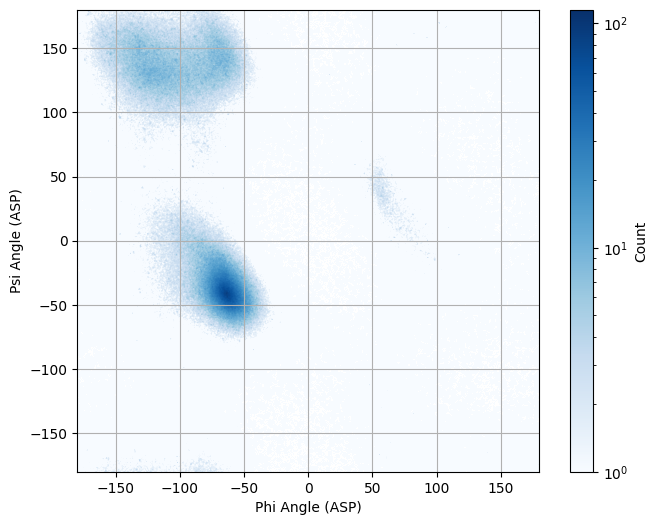

In [ ]:
# Calculate histogram
hist, xedges, yedges = np.histogram2d(phi_angles_redo, psi_angles_redo, bins=1000)

# Ramachandran plot
plt.figure(figsize=(8, 6), facecolor='white')
plt.imshow(hist.T, extent=[
    xedges.min(), xedges.max(), yedges.min(), yedges.max()],
          origin='lower',
          cmap='Blues', interpolation='gaussian', norm='log')

# Add colorbar, label and title
plt.colorbar(label='Count')
plt.xlabel('Phi Angle (ASP)')
plt.ylabel('Psi Angle (ASP)')
plt.xlim(-180, 180)
plt.ylim(-180, 180)
plt.grid(True)
plt.show()

## Different residues types

In [ ]:
from tqdm import tqdm
import numpy as np
import gemmi
from math import degrees, isnan

# Create a dictionary to store the φ and ψ angles for each residue type
residue_angles = {}

for path in tqdm(gemmi.CoorFileWalk(pdb_directory_2), total=len(pdb_list_2)):
    structure = gemmi.read_structure(path)
    model = structure[0]

    for chain in model:
        for residue in chain:
            next_res = chain.next_residue(residue)
            prev_res = chain.previous_residue(residue)
            if next_res:
                phi, psi = gemmi.calculate_phi_psi(prev_res, residue, next_res)
                if not isnan(phi) and not isnan(psi):
                    # Get residue type
                    residue_type = residue.name
                    # If the residue type does not exist in the dictionary, create an empty list
                    if residue_type not in residue_angles:
                        residue_angles[residue_type] = {'phi': [], 'psi': []}
                    # Store φ and ψ angles
                    residue_angles[residue_type]['phi'].append(degrees(phi))
                    residue_angles[residue_type]['psi'].append(degrees(psi))

# Convert data points to NumPy array
for residue_type in residue_angles:
    residue_angles[residue_type]['phi'] = np.array(residue_angles[residue_type]['phi'])
    residue_angles[residue_type]['psi'] = np.array(residue_angles[residue_type]['psi'])

100%|██████████| 1672/1672 [03:40<00:00,  7.57it/s]


In [ ]:
residue_angles

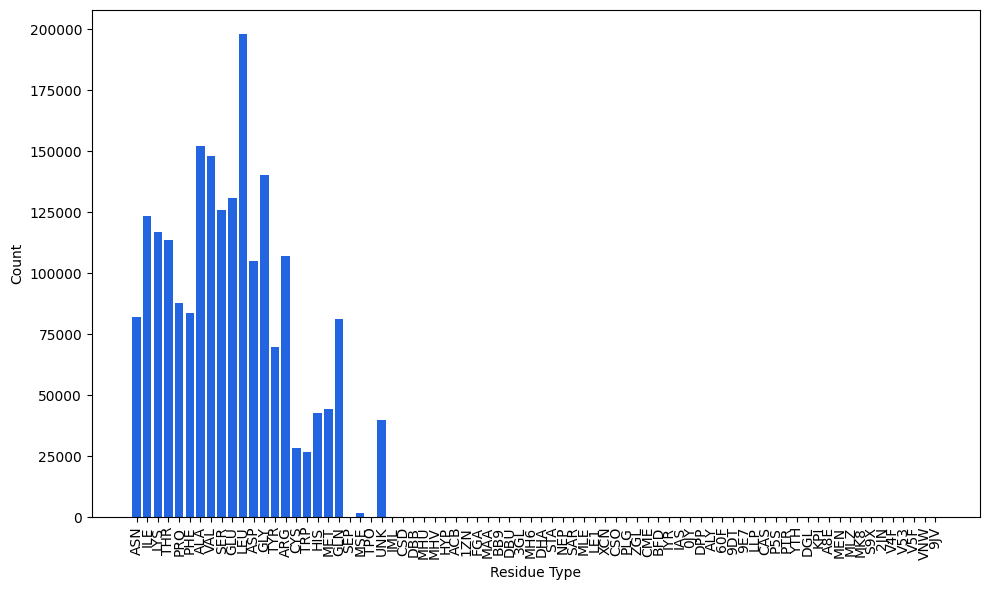

In [ ]:
import matplotlib.pyplot as plt

# Extract different residue types and corresponding quantities
residue_counts = {residue_type: len(residue_angles[residue_type]['phi']) for residue_type in residue_angles}

# histogram
custom_color = [(35/255, 100/255, 225/255)]
plt.figure(figsize=(10, 6))
plt.bar(residue_counts.keys(), residue_counts.values(), color=custom_color)
plt.xlabel('Residue Type')
plt.ylabel('Count')
# plt.title('Number of Residues by Type')
plt.xticks(rotation=90, ha='center')  # Rotate x-axis labels so they appear vertically
plt.tight_layout()  #Adjust the layout to prevent labels from overlapping
plt.show()


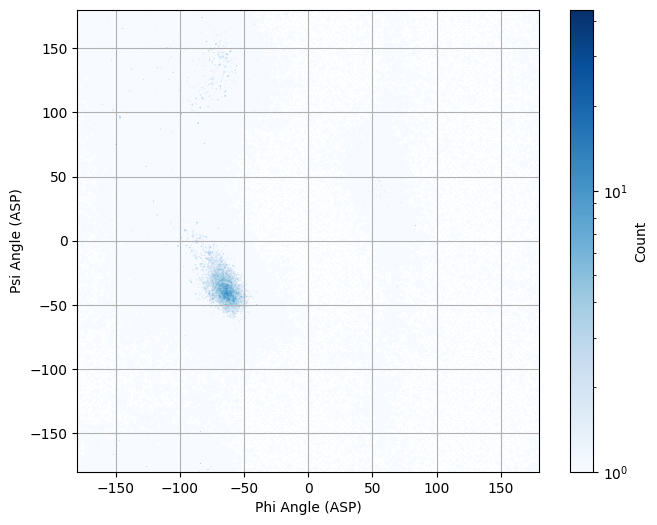

In [ ]:
import matplotlib.pyplot as plt

#Select the φ and ψ angle data corresponding to ASP
alanine_phi = residue_angles['ASP']['phi']
alanine_psi = residue_angles['ASP']['psi']

# Calculate histogram
hist, xedges, yedges = np.histogram2d(alanine_phi, alanine_psi, bins=1000)

# Ramachandran plot
plt.figure(figsize=(8, 6), facecolor='white')
plt.imshow(hist.T, extent=[
    xedges.min(), xedges.max(), yedges.min(), yedges.max()],
          origin='lower',
          cmap='Blues',
           interpolation='gaussian', norm='log'
           )
# Add colorbar, label and title
plt.colorbar(label='Count')
plt.xlabel('Phi Angle (ASP)')
plt.ylabel('Psi Angle (ASP)')
plt.xlim(-180, 180)
plt.ylim(-180, 180)
plt.grid(True)
plt.show()

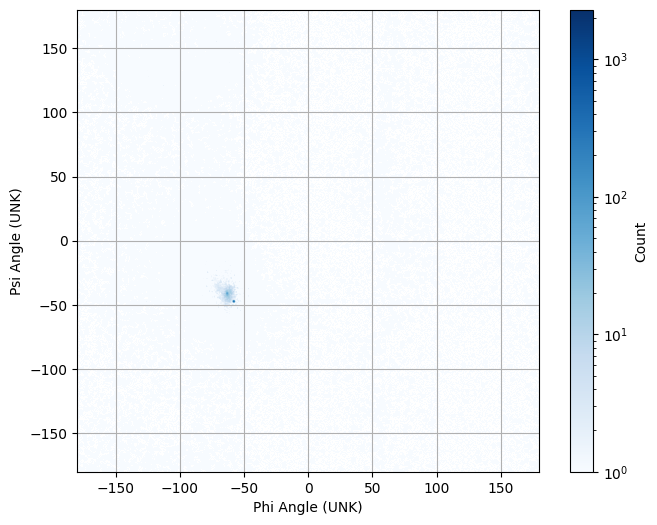

In [ ]:
import matplotlib.pyplot as plt

#Select the φ and ψ angle data corresponding to UNK
alanine_phi = residue_angles['UNK']['phi']
alanine_psi = residue_angles['UNK']['psi']

# Calculate histogram
hist, xedges, yedges = np.histogram2d(alanine_phi, alanine_psi, bins=1000)

# Ramachandran plot
plt.figure(figsize=(8, 6), facecolor='white')
plt.imshow(hist.T, extent=[
    xedges.min(), xedges.max(), yedges.min(), yedges.max()],
          origin='lower',
          cmap='Blues',
           interpolation='gaussian', norm='log'
           )
# Add colorbar, label and title
plt.colorbar(label='Count')
plt.xlabel('Phi Angle (UNK)')
plt.ylabel('Psi Angle (UNK)')
plt.xlim(-180, 180)
plt.ylim(-180, 180)
plt.grid(True)
plt.show()

## Optimization of plots

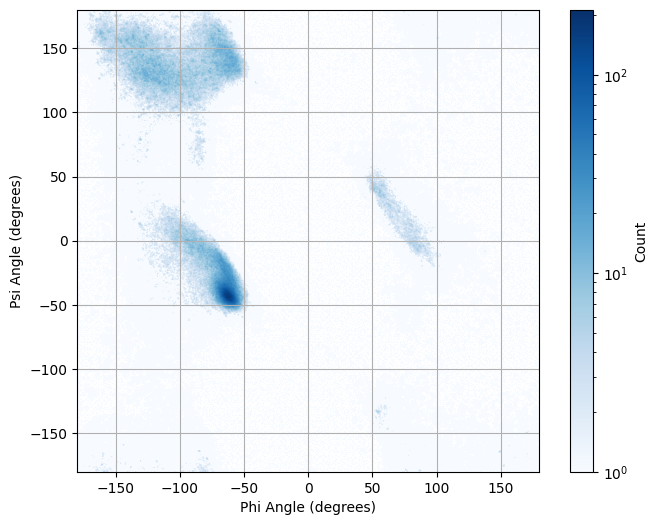

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Calculate histogram
hist, xedges, yedges = np.histogram2d(all_phi_angles, all_psi_angles, bins=1000)

# Ramachandran plot
plt.figure(figsize=(8, 6), facecolor='white')
plt.imshow(hist.T, extent=[
    xedges.min(), xedges.max(), yedges.min(), yedges.max()],
          origin='lower',
          cmap='Blues', interpolation='gaussian', norm='log')

# Add colorbar, label and title
plt.colorbar(label='Count')
plt.xlabel('Phi Angle (degrees)')
plt.ylabel('Psi Angle (degrees)')
plt.xlim(-180, 180)
plt.ylim(-180, 180)
plt.grid(True)
plt.show()

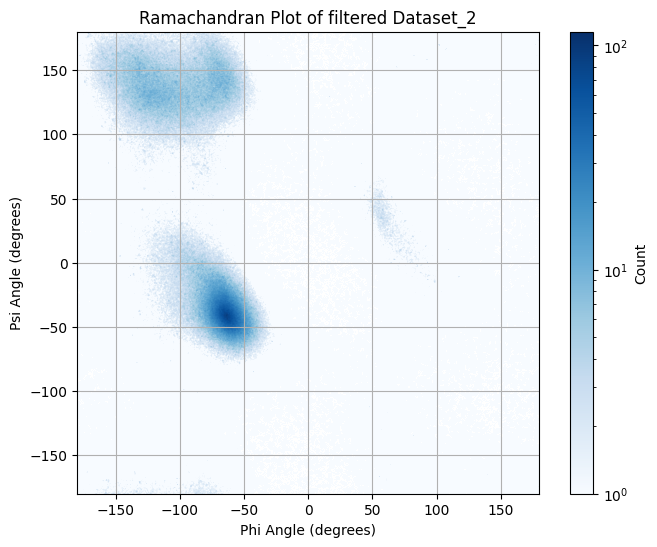

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Calculate histogram
hist, xedges, yedges = np.histogram2d(phi_angles_redo, psi_angles_redo, bins=1000)

# Ramachandran plot
plt.figure(figsize=(8, 6), facecolor='white')
plt.imshow(hist.T, extent=[
    xedges.min(), xedges.max(), yedges.min(), yedges.max()],
          origin='lower',
          cmap='Blues', interpolation='gaussian', norm='log')

# Add colorbar, label and title
plt.colorbar(label='Count')
plt.xlabel('Phi Angle (degrees)')
plt.ylabel('Psi Angle (degrees)')
plt.title('Ramachandran Plot of filtered Dataset_2')
plt.xlim(-180, 180)
plt.ylim(-180, 180)
plt.grid(True)
plt.show()